<a href="https://colab.research.google.com/github/pjcroxas/road-safety/blob/main/road_safety_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install basemap
# !pip install basemap-data-hires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import cufflinks as cf
from datetime import datetime as dt
import plotly.express as px
import datetime
import warnings, os, re
warnings.filterwarnings('ignore')

In [ ]:
dirs = "/content/drive/My Drive/Data Science Portfolio/Transportation Analytics/Datasets"
crash_df = pd.read_excel(dirs+"/DRIVERs_2017_2021_v2.xlsx")
crash_df.sample(3)

,record_id,timezone,created,modified,occurred_from,occurred_to,lat,lon,location_text,city,...,Loading,Maneuver,driverVehicle_id,Plate number,Vehicle type,Engine number,Chassis number,Classification,Insurance details,Year
18851,7a3f7043-cc3b-42ae-b8ef-09b51dafe108,UTC,2018-11-05 13:10:17,2018-11-05 13:10:17,2018-11-05 09:34:17,2018-11-05 09:34:17,14.656420,121.027279,"Philippine College of Surgeons, 992, EDSA, San...",NaN,...,NaN,NaN,ebbdcfc0-e822-43e6-9cfd-ec25dc2d9ff4,137888,Bus,NaN,NaN,Public / For-Hire,NaN,2018
13975,901cc398-706e-4c69-b646-ae454ec606c6,UTC,2017-01-18 10:38:17,2017-01-18 10:38:17,2017-01-18 09:39:56,2017-01-18 09:39:56,14.601442,121.079292,"Jollibee, E. Rodriguez Jr. Avenue, Bagumbayan,...",Quezon City,...,NaN,NaN,460aca27-de44-417b-9fb3-3cdb2fad1be9,WIL-972,Car,NaN,NaN,Private,NaN,2017
19246,0c070a8c-2554-4fbb-9ead-040775da34cc,UTC,2018-10-29 12:47:28,2018-10-29 12:47:28,2018-10-29 11:08:33,2018-10-29 11:08:33,14.584570,121.055657,"Highway 54, EDSA, Wack-Wack Greenhills, Mandal...",NaN,...,NaN,NaN,b3579416-761e-45be-bac0-69a4c6aeda90,OX-9303,Truck (Pick-Up),NaN,NaN,Private,NaN,2018


In [ ]:
# Dataframe Shape
crash_df.shape

(60644, 55)

# **Feature Engineering**

In [ ]:
# Extract Date Features
crash_df["occurred_day"] = crash_df["occurred_from"].dt.day
crash_df["occurred_dayofweek"] = crash_df["occurred_from"].dt.day_name()
crash_df["occurred_weekday"] = crash_df["occurred_from"].dt.weekday
crash_df["occurred_hour"] = crash_df["occurred_from"].dt.hour
crash_df["occurred_month"] = crash_df["occurred_from"].dt.month
crash_df["occurred_year"] = crash_df["occurred_from"].dt.year

crash_df.sample(3)

,record_id,timezone,created,modified,occurred_from,occurred_to,lat,lon,location_text,city,...,Chassis number,Classification,Insurance details,Year,occurred_day,occurred_dayofweek,occurred_weekday,occurred_hour,occurred_month,occurred_year
24314,5c6714f6-6ddb-43fa-ba30-653698dde1dd,UTC,2018-08-25 13:03:21,2018-12-13 20:10:09,2018-08-25 12:55:28,2018-08-25 12:55:28,14.623451,121.048994,"JAM, Maryland, Pinagkaisahan, Immaculate Conce...",NaN,...,NaN,Public / For-Hire,NaN,2018,25,Saturday,5,12,8,2018
39586,c27c18f1-263d-45ed-942c-6b96c59f0b05,UTC,2019-08-22 05:59:33,2019-08-22 05:59:33,2019-08-22 00:01:11,2019-08-22 00:01:11,14.613589,121.053672,"Petron, EDSA, Bagong Lipunan ng Crame, Distric...",NaN,...,NaN,NaN,NaN,2019,22,Thursday,3,0,8,2019
51497,0bd7757b-696b-4e37-ad08-3977025c8601,UTC,2019-01-18 06:58:46,2019-01-18 06:58:46,2019-01-18 02:24:54,2019-01-18 02:24:54,14.668647,121.075666,"Diliman Doctors Hospital, Commonwealth Avenue,...",NaN,...,NaN,NaN,NaN,2019,18,Friday,4,2,1,2019


In [ ]:
crash_df.columns

Index(['record_id', 'timezone', 'created', 'modified', 'occurred_from',
       'occurred_to', 'lat', 'lon', 'location_text', 'city', 'city_district',
       'county', 'neighborhood', 'road', 'state', 'weather', 'light',
       'Severity', 'driverIncidentDetails_id', 'Main Cause', 'Description',
       'Collision Type', 'Email of Encoder', 'Reporting Agency',
       'Location Approximate', 'Notes', 'driverNotes_id', 'Age', 'Gender',
       'Injury', 'Address', 'Hospital', 'driverPerson_id', 'Last Name',
       'First Name', 'Involvment', 'Middle Name', 'Driver error',
       'Alcohol/drugs', 'License Number', 'Seat belt/helmet', 'Make', 'Model',
       'Damage', 'Defect', 'Loading', 'Maneuver', 'driverVehicle_id',
       'Plate number', 'Vehicle type', 'Engine number', 'Chassis number',
       'Classification', 'Insurance details', 'Year', 'occurred_day',
       'occurred_dayofweek', 'occurred_weekday', 'occurred_hour',
       'occurred_month', 'occurred_year'],
      dtype='object')

In [ ]:
import pandas as pd
import re
import numpy as np

def extract_city_or_province(input_string):
    if pd.isna(input_string):
        return None
    # Regular expression pattern to match a city or province name followed by a 4-digit code
    pattern = r',\s*([\w\s]+),\s\d{4}'

    # Search for the pattern in the input string
    match = re.search(pattern, input_string)

    # If a match is found, return the city or province name
    if match:
        return match.group(1).strip()
    else:
        return None

# Example pandas DataFrame
data = {'column_string': ['Petron, East Service Road, Bunye Compound, Alabang, Muntinlupa, Metro Manila, 1781, Philippines']}
df = pd.DataFrame(data)

# Apply the function to extract city or province names
df['city_or_province'] = df['column_string'].apply(extract_city_or_province)

# Display the DataFrame with extracted city or province names
print(df)

                                       column_string city_or_province
0  Petron, East Service Road, Bunye Compound, Ala...     Metro Manila


In [ ]:
# Extract region
crash_df["region"] = crash_df['location_text'].apply(extract_city_or_province)
crash_df["region"].value_counts()

,count
region,
Metro Manila,51963
Central Visayas,1879
Calabarzon,383
Caraga,154
Mimaropa,20
Northern Mindanao,14
Western Visayas,12
Zamboanga Peninsula,7
Maharashtra,5


# **Data Quality Inspection**

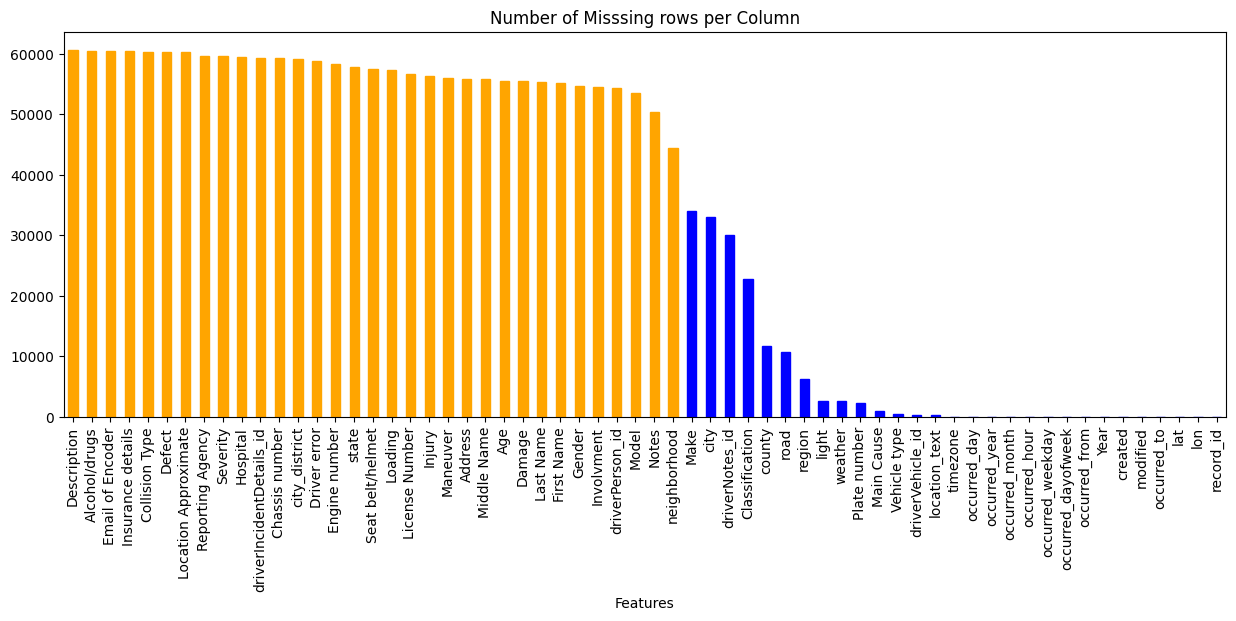

In [ ]:
# Missing Data

cm = sns.light_palette("green", as_cmap=True)
crash_dq = crash_df.isnull().sum().reset_index()
crash_dq.rename(columns={"index": "Column names",
                               0: "Missing rows"}, inplace=True)
crash_dq.sort_values(by="Missing rows", ascending=False, inplace=True)
crash_dq.set_index("Column names", inplace=True)
ax = crash_dq.plot(kind="bar", figsize=(15, 5))

colors = ['blue' if val < 40000 else 'orange' for val in crash_dq['Missing rows']]

# Applying custom colors to the bars
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])
ax.set_axisbelow(True)
ax.get_legend().remove()
# ax.grid()
plt.title("Number of Misssing rows per Column")
plt.xlabel("Features")
style.use("default")

# **Analyzing the Situation**

Text(0, 0.5, ' ')

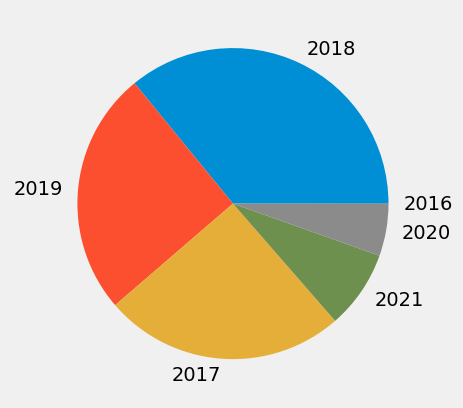

In [ ]:
# crash_df["occurred_year"] = crash_df["occurred_year"].astype(int)
style.use("fivethirtyeight")
ax = crash_df["occurred_year"].value_counts().plot(kind="pie")
ax.set_facecolor("white")
plt.ylabel(" ")

The largest number of recorded accidents was on 2018, while the lowest were in 2016. Notice that there is no recorded accidents for 2021, that is because the reported accidents on this year happen on 2020.

In [ ]:
# Person involved
crash_inv = crash_df.groupby(['record_id']).count()['timezone'].reset_index()
crash_inv.rename(columns={'timezone':'no. of person involved'}, inplace=True)
crash_inv

,record_id,no. of person involved
0,00008d64-e477-4230-96e2-6c9289751bb7,2
1,00023731-6c6b-496f-9753-d510ebdab2c6,2
2,000570e2-29d5-4f44-a36d-c7566467b85a,2
3,000caf7d-6298-4bf0-a2cd-0ece432d93b4,2
4,0010b5b0-9a25-47a4-8bb6-c64877acffed,2
...,...,...
29120,fff234d2-1dbd-46ed-a109-21855409485d,2
29121,fff29817-ed4d-4822-bb74-73fe7e7648f6,2
29122,fff7a248-de2a-4722-935e-891384a43a1f,2
29123,fff7b88b-d4e2-4ac3-af44-d5bfd93b73b1,2


In [ ]:
crash_inv = crash_df.groupby(["record_id", 'Severity']).agg({'timezone': 'count'}).reset_index()
crash_inv.rename(columns={'timezone':'no. of person involved'}, inplace=True)
crash_inv

,record_id,Severity,no. of person involved
0,00a189af-5abf-40bd-a4af-d731ef4b4a12,Property,2
1,00ebe675-141f-41fa-9ebf-0f227fb1eb0a,Injury,1
2,012f4961-7201-46b1-8a59-a02ae91d4ea2,Property,2
3,0163bab0-a5dc-4250-a59e-9dd7fd21880f,Injury,1
4,01e1adff-ee81-4177-8119-ce0fe32f9d18,Property Damage,2
...,...,...,...
547,fda565f1-475e-42fe-860b-97501377c8b0,Property Damage,2
548,fea9f536-8ee2-490d-a27b-c734d9764c80,Injury,1
549,ff7bf186-3a42-4337-af77-feb99b0fa95b,Injury,1
550,ff811e62-1064-42ab-882d-8d798f3acc59,Injury,1


In [ ]:
def annotate_stacked_bars(ax, has_perc, pad=0.99, colour="white", textsize=100):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    if has_perc:
      for p in ax.patches:

          # Calculate annotation
          value = str(round(p.get_height(),1)) + "%"
          # If value is 0 do not annotate
          if value == '0.0%':
              continue
          ax.annotate(
              value,
              ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
              color=colour,
              size=textsize
          )
    else:
      for p in ax.patches:

          # Calculate annotation
          value = str(round(p.get_height(),1))
          # If value is 0 do not annotate
          if value == '0.0':
              continue
          ax.annotate(
              value,
              ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
              color=colour,
              size=textsize
          )

def annotate_stacked_bars_horizontal(ax, pad=0.99, colour="white", textsize=100):
    """
    Add value annotations to horizontal bars
    """

    # Iterate over the plotted rectangles/bars
    for p in ax.patches:

        # Calculate annotation
        value = str(round(p.get_width(), 1)) + "%"
        # If value is 0 do not annotate
        if value == '0.0%':
            continue
        ax.annotate(
            value,
            ((p.get_x() + p.get_width()/2) * pad, (p.get_y() + p.get_height()/2) * pad),
            color=colour,
            size=textsize
        )

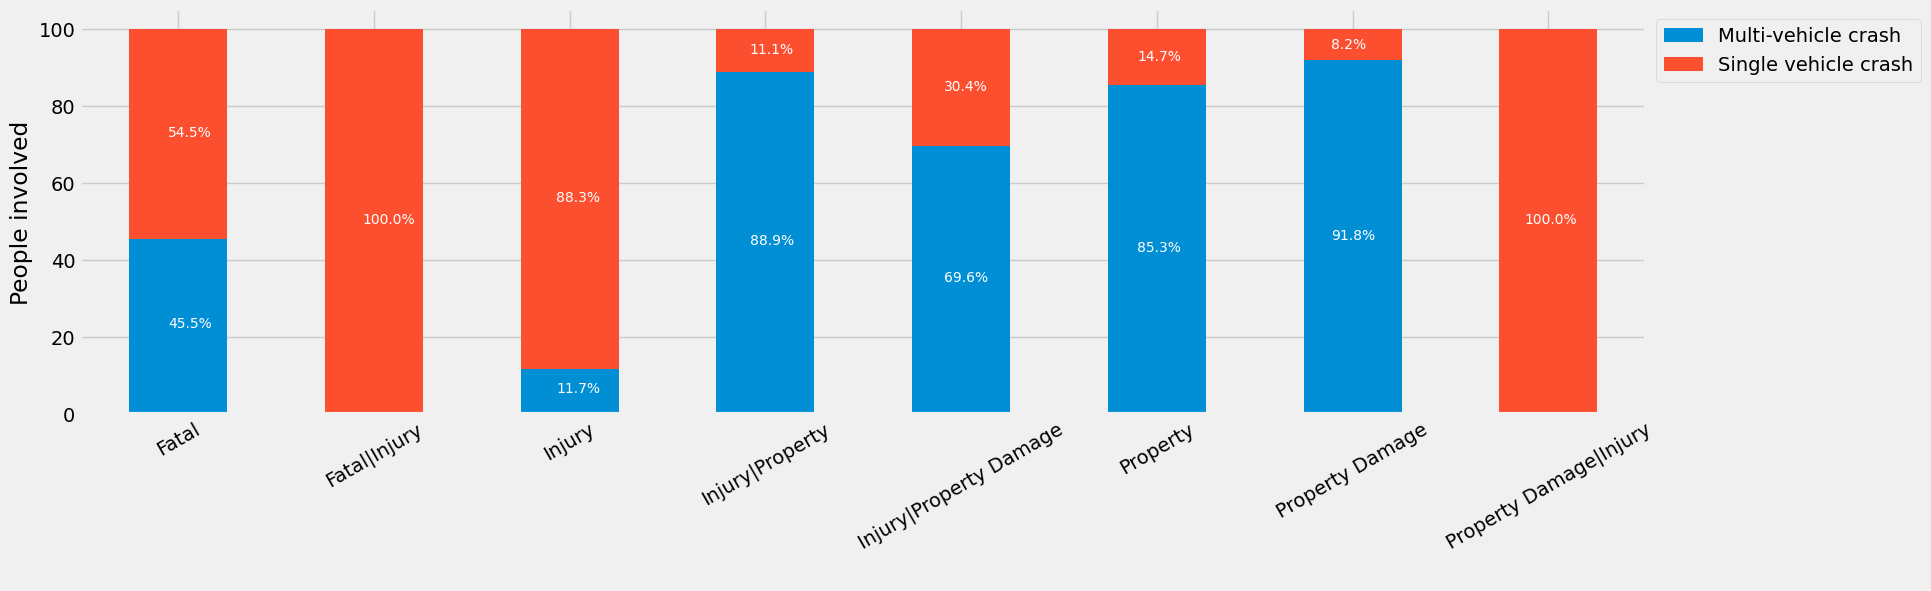

In [ ]:
def collision_or_crash(data):
  if data > 1:
    return 'Multi-vehicle crash'
  elif data == 1:
    return 'Single vehicle crash'
  else:
    pass

crash_inv["classification"] = crash_inv["no. of person involved"].apply(collision_or_crash)
crash_inv_grouped = crash_inv.groupby(["classification", "Severity"]).count()["no. of person involved"].reset_index()
crash_pivot = crash_inv_grouped.pivot(index="Severity",
                                   columns="classification",
                                   values="no. of person involved")
crash_pivot = (crash_pivot.div(crash_pivot.sum(axis=1), axis=0) * 100)
ax = crash_pivot.plot(kind="bar", stacked=True, figsize=(18, 5))
# plt.title("Severity per Crash Type")
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=30)
plt.xlabel(" ")
plt.ylabel("People involved")
annotate_stacked_bars(ax, has_perc=True,textsize=10)

In [ ]:
crash_inv_grouped.pivot(index="Severity",
                        columns="classification",
                        values="no. of person involved")

classification,Multi-vehicle crash,Single vehicle crash
Severity,,
Fatal,5.0,6.0
Fatal|Injury,NaN,1.0
Injury,28.0,212.0
Injury|Property,8.0,1.0
Injury|Property Damage,16.0,7.0
Property,145.0,25.0
Property Damage,89.0,8.0
Property Damage|Injury,NaN,1.0


Event Involvement

On average, there are more people involved colliding with other people or vehicle than people crashing by itself.

Accident Location

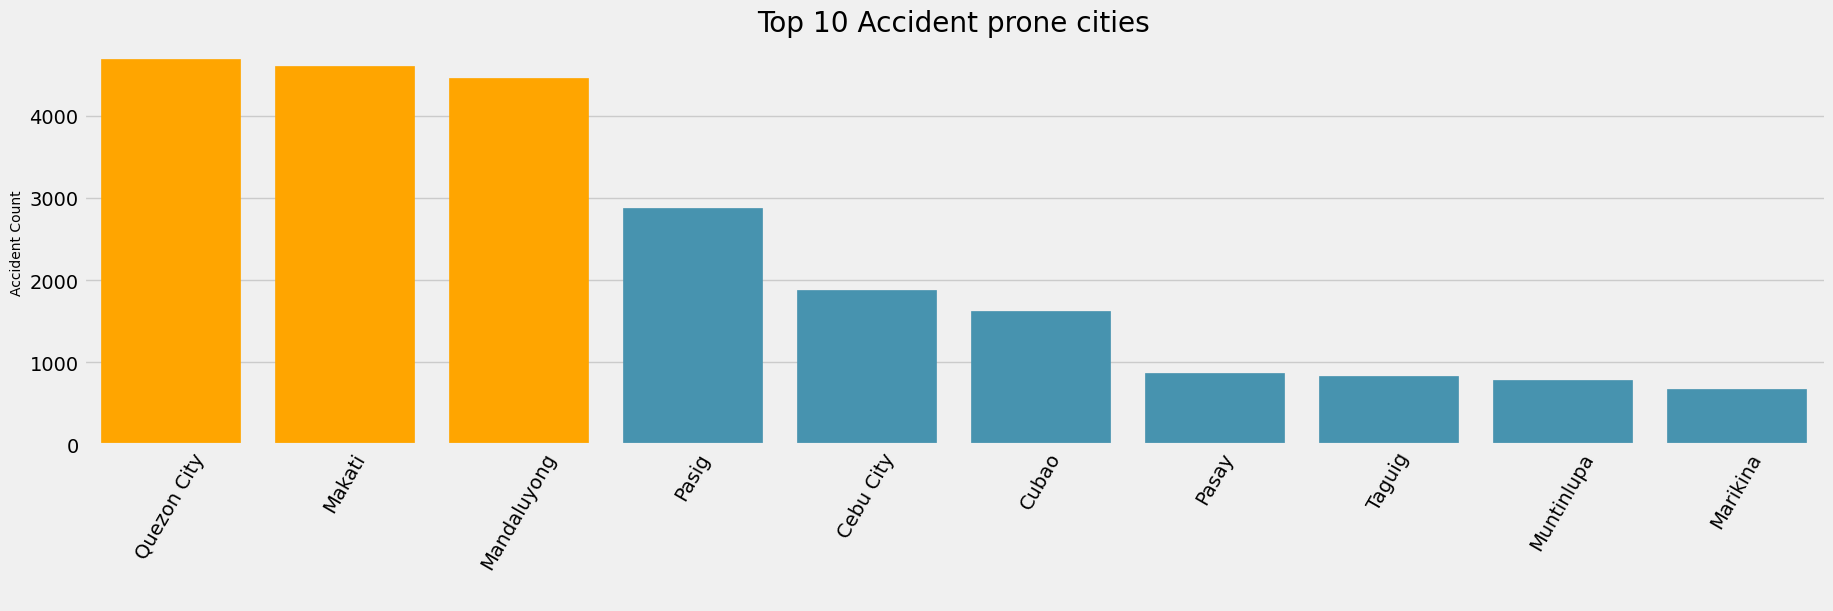

In [ ]:
crash_city = crash_df.groupby(["city"]).count()["timezone"].reset_index()
crash_city.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_city.rename(columns={'timezone':'accident count'}, inplace=True)

plt.figure(figsize=[20, 5])
crash_city_20 = crash_city[:10]
ax = sns.barplot(x=crash_city_20["city"], y=crash_city_20["accident count"])
plt.ylabel("Accident Count", fontsize=10)
plt.xlabel(" ")
plt.xticks(rotation=60)
plt.title("Top 10 Accident prone cities")
ax.set_axisbelow(True)
# ax.grid()
ax.spines[['right', 'top']].set_visible(False)
style.use("default")

colors = ['#4793AF' if val < 4000 else 'orange' for val in crash_city_20['accident count']]

# Applying custom colors to the bars
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

In [ ]:
crash_df.columns

Index(['record_id', 'timezone', 'created', 'modified', 'occurred_from',
       'occurred_to', 'lat', 'lon', 'location_text', 'city', 'city_district',
       'county', 'neighborhood', 'road', 'state', 'weather', 'light',
       'Severity', 'driverIncidentDetails_id', 'Main Cause', 'Description',
       'Collision Type', 'Email of Encoder', 'Reporting Agency',
       'Location Approximate', 'Notes', 'driverNotes_id', 'Age', 'Gender',
       'Injury', 'Address', 'Hospital', 'driverPerson_id', 'Last Name',
       'First Name', 'Involvment', 'Middle Name', 'Driver error',
       'Alcohol/drugs', 'License Number', 'Seat belt/helmet', 'Make', 'Model',
       'Damage', 'Defect', 'Loading', 'Maneuver', 'driverVehicle_id',
       'Plate number', 'Vehicle type', 'Engine number', 'Chassis number',
       'Classification', 'Insurance details', 'Year', 'occurred_day',
       'occurred_dayofweek', 'occurred_weekday', 'occurred_hour',
       'occurred_month', 'occurred_year', 'region'],
      dtype='o

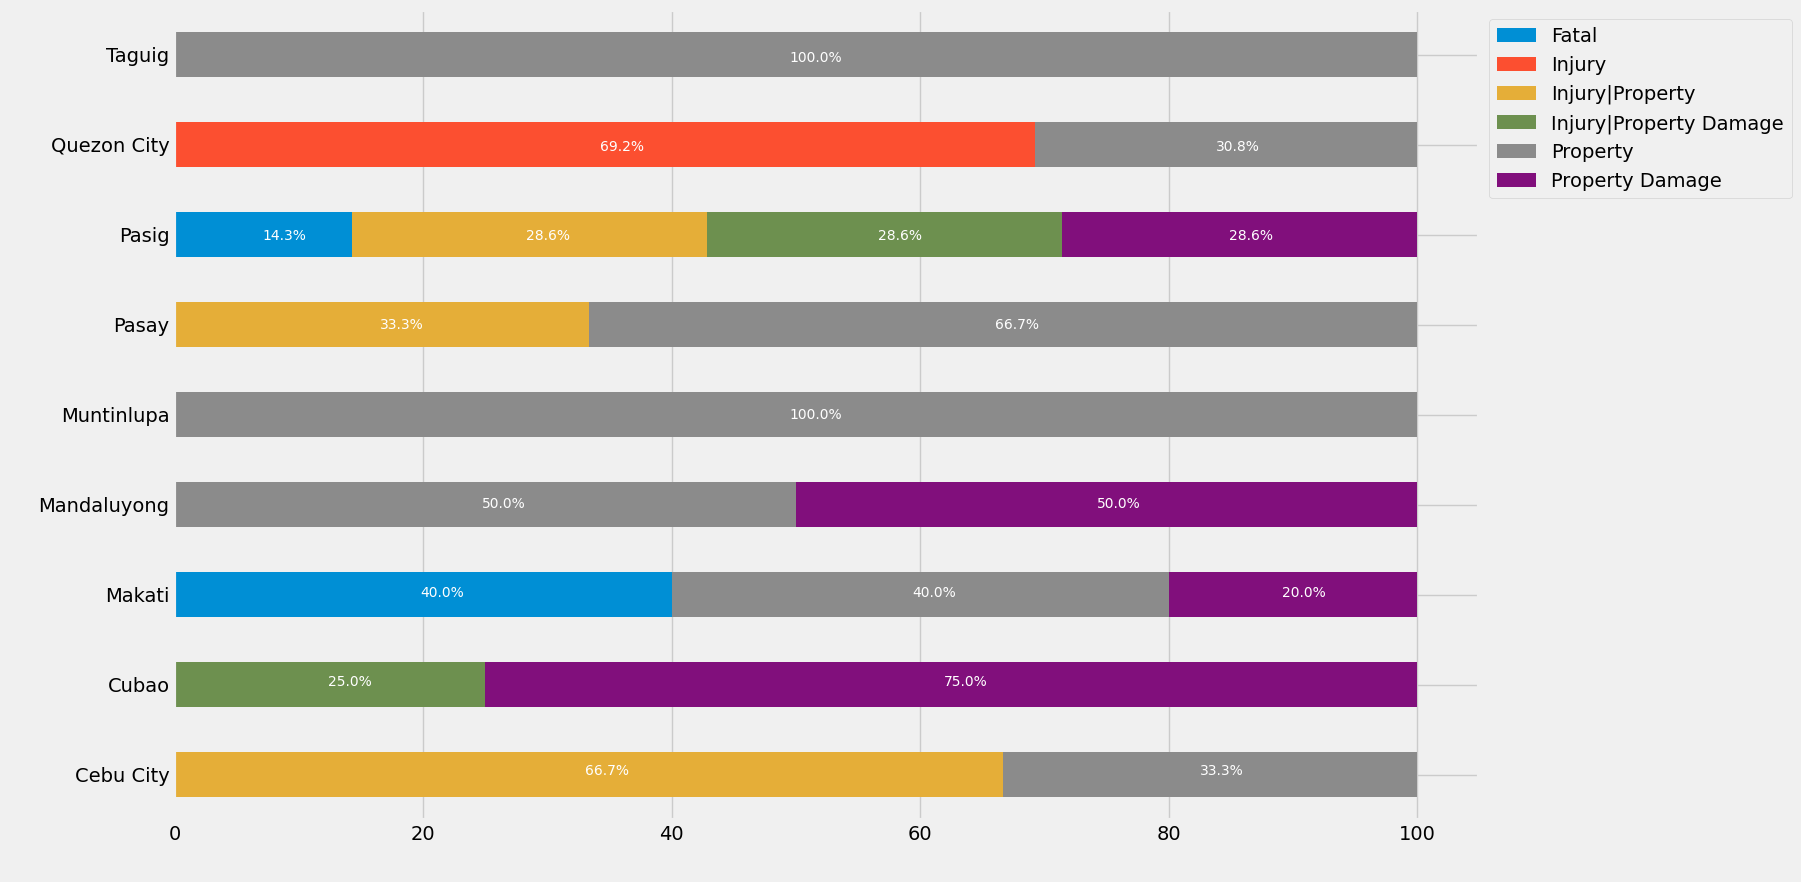

In [ ]:
style.use('fivethirtyeight')
severity_per_city = crash_df.groupby(["city", "Severity"]).count()["timezone"].reset_index()
severity_per_city_filtered = severity_per_city[severity_per_city['city'].isin(crash_city_20['city'])]
severity_per_city_filtered.sort_values(by=["timezone"], inplace=True, ascending=False)
severity_per_city_filtered.rename(columns={'timezone':'accident count'}, inplace=True)
severity_per_city_pivot = severity_per_city_filtered.pivot(index = "city",
                                                  columns = "Severity",
                                                  values = "accident count")
severity_per_city_pivot = (severity_per_city_pivot.div(severity_per_city_pivot.sum(axis=1), axis=0) * 100)
ax = severity_per_city_pivot.plot(kind="barh", stacked=True, figsize=(15, 10))
# plt.title("Severity per Crash Type")
plt.legend(bbox_to_anchor=(1, 1))
# plt.xticks(rotation=30)
plt.xlabel(" ")
plt.ylabel(" ")
annotate_stacked_bars_horizontal(ax, textsize=10)

In [ ]:
severity_per_city_pivot

Severity,Fatal,Injury,Injury|Property,Injury|Property Damage,Property,Property Damage
city,,,,,,
Cebu City,NaN,NaN,66.666667,NaN,33.333333,NaN
Cubao,NaN,NaN,NaN,25.000000,NaN,75.000000
Makati,40.000000,NaN,NaN,NaN,40.000000,20.000000
Mandaluyong,NaN,NaN,NaN,NaN,50.000000,50.000000
Muntinlupa,NaN,NaN,NaN,NaN,100.000000,NaN
Pasay,NaN,NaN,33.333333,NaN,66.666667,NaN
Pasig,14.285714,NaN,28.571429,28.571429,NaN,28.571429
Quezon City,NaN,69.230769,NaN,NaN,30.769231,NaN
Taguig,NaN,NaN,NaN,NaN,100.000000,NaN


In [ ]:
crash_road = crash_df.groupby(["road","lat", "lon", "region"]).count()["timezone"].reset_index()
crash_road.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_road.rename(columns={'timezone':'accident count'}, inplace=True)
crash_road.sample(5)

,road,lat,lon,region,accident count
15207,Natalio Bacalso Avenue,10.294145,123.881559,Central Visayas,2
14858,Monte de Piedad,14.623456,121.049080,Metro Manila,2
3372,Commonwealth Avenue,14.672113,121.079292,Metro Manila,2
8090,EDSA,14.587861,121.056590,Metro Manila,1
11226,F. Ortigas Jr. Road,14.589388,121.062802,Metro Manila,2


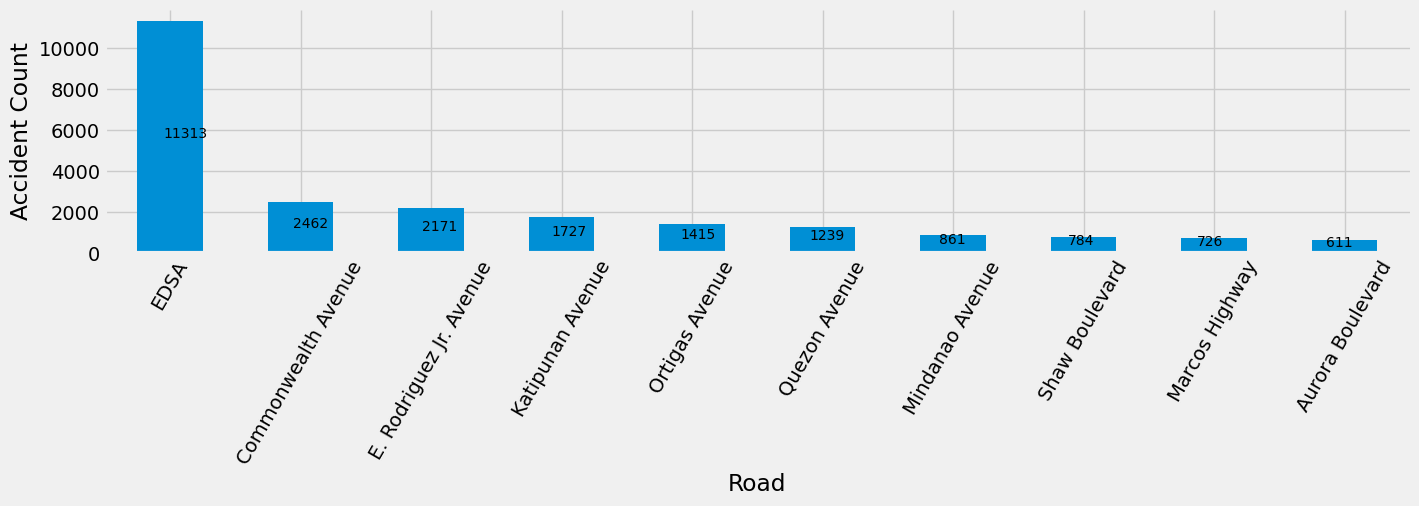

In [ ]:
crash_road_manila = crash_road[crash_road["region"]=="Metro Manila"]
by_road = crash_road_manila.groupby(["road"]).sum()["accident count"].reset_index()
by_road.sort_values(by="accident count", ascending=False, inplace=True)
by_road.set_index("road", inplace=True)
# plt.figure()
style.use("fivethirtyeight")
by_road_10 = by_road[:10]
ax = by_road_10.plot(kind="bar", figsize=(15, 3))
plt.ylabel("Accident Count")
# plt.title("Top 20 Accident prone Roads")
plt.xlabel("Road")
plt.xticks(rotation=60)
ax.legend().remove()
ax.spines[['right', 'top']].set_visible(False)

colors = ['#4793AF' if val < 4000 else 'orange' for val in by_road['accident count']]

# Applying custom colors to the bars
annotate_stacked_bars(ax,has_perc=False,colour="black" ,textsize=10)

Severity per road

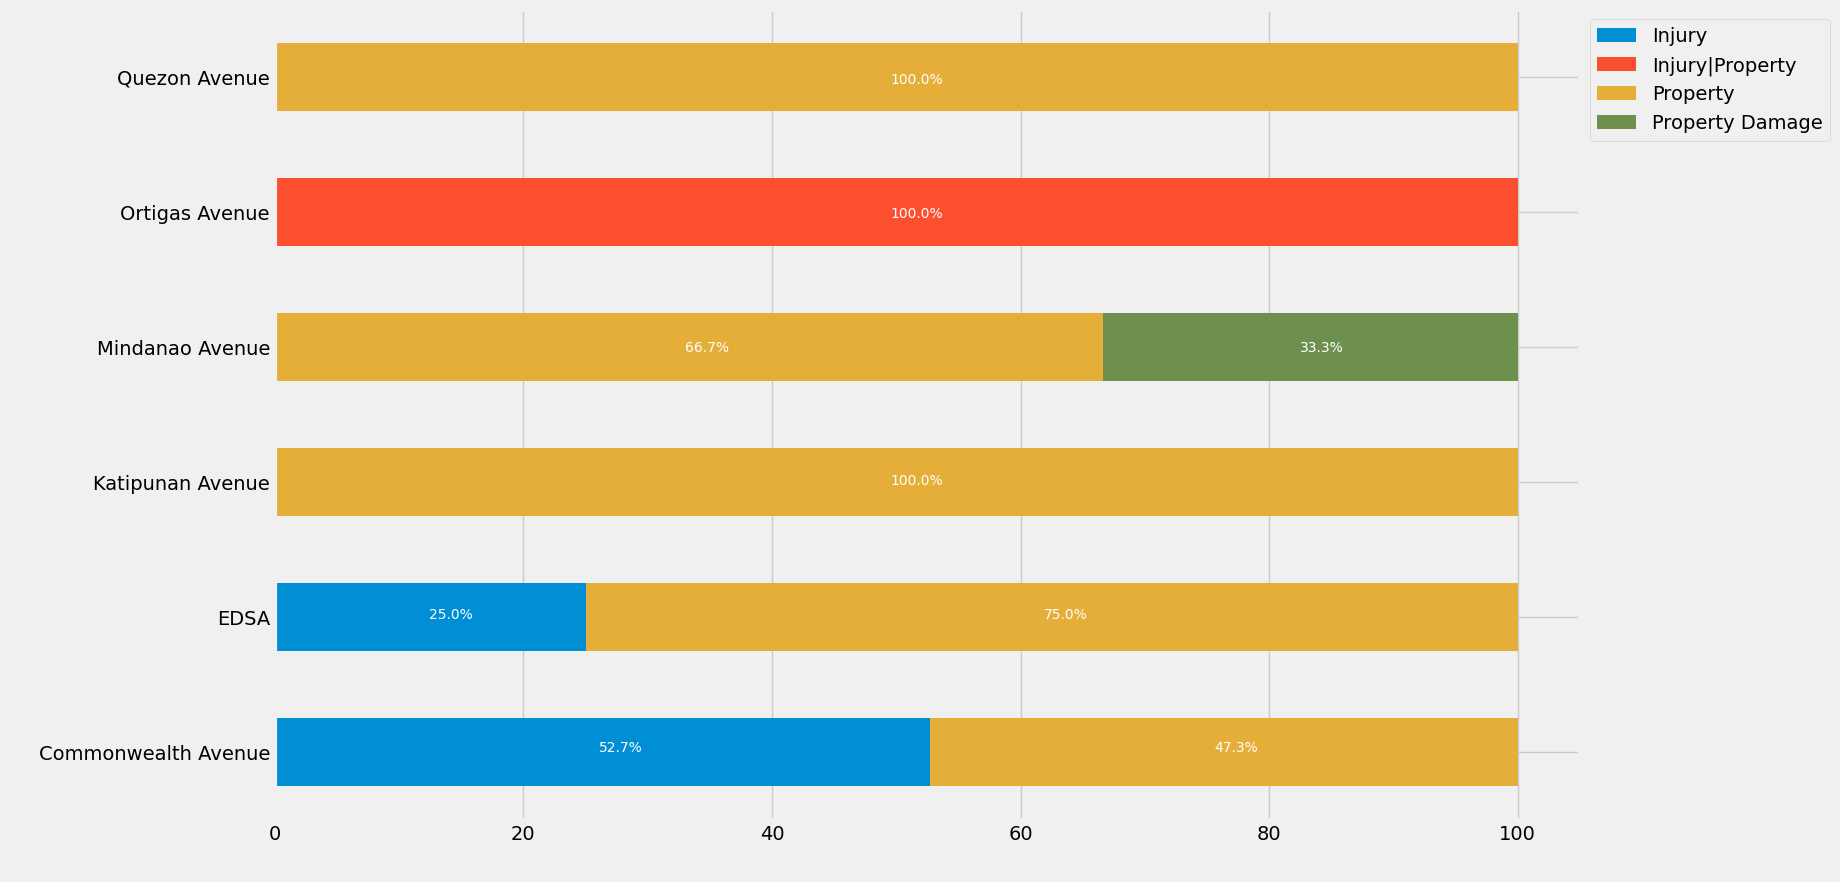

In [ ]:
style.use('fivethirtyeight')
severity_per_road = crash_df.groupby(["road", "Severity"]).count()["timezone"].reset_index()
severity_per_road_filtered = severity_per_road[severity_per_road['road'].isin(by_road_10.index)]
severity_per_road_filtered.sort_values(by=["timezone"], inplace=True, ascending=False)
severity_per_road_filtered.rename(columns={'timezone':'accident count'}, inplace=True)
severity_per_road_pivot = severity_per_road_filtered.pivot(index = "road",
                                                  columns = "Severity",
                                                  values = "accident count")
severity_per_road_pivot = (severity_per_road_pivot.div(severity_per_road_pivot.sum(axis=1), axis=0) * 100)
ax = severity_per_road_pivot.plot(kind="barh", stacked=True, figsize=(15, 10))
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel(" ")
plt.ylabel(" ")
annotate_stacked_bars_horizontal(ax, textsize=10)

Time Analysis

Text(0.5, 19.583333333333293, 'Year')

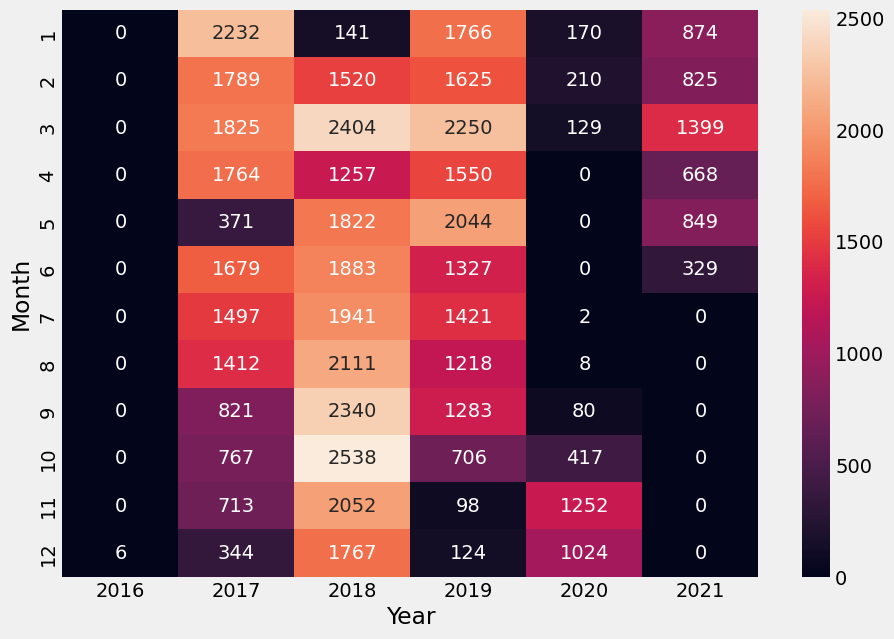

In [ ]:
crash_grp_year_month = crash_df.groupby(["occurred_year", "occurred_month"]).count()["timezone"].reset_index()
crash_pivot_year_month = crash_grp_year_month.pivot(index="occurred_month",
                                                    columns="occurred_year",
                                                    values="timezone").fillna(0)

plt.figure(figsize=(10,7))
sns.heatmap(crash_pivot_year_month, annot=True, fmt="g")
plt.ylabel("Month")
plt.xlabel("Year")

Text(0.5, 19.583333333333293, 'Day')

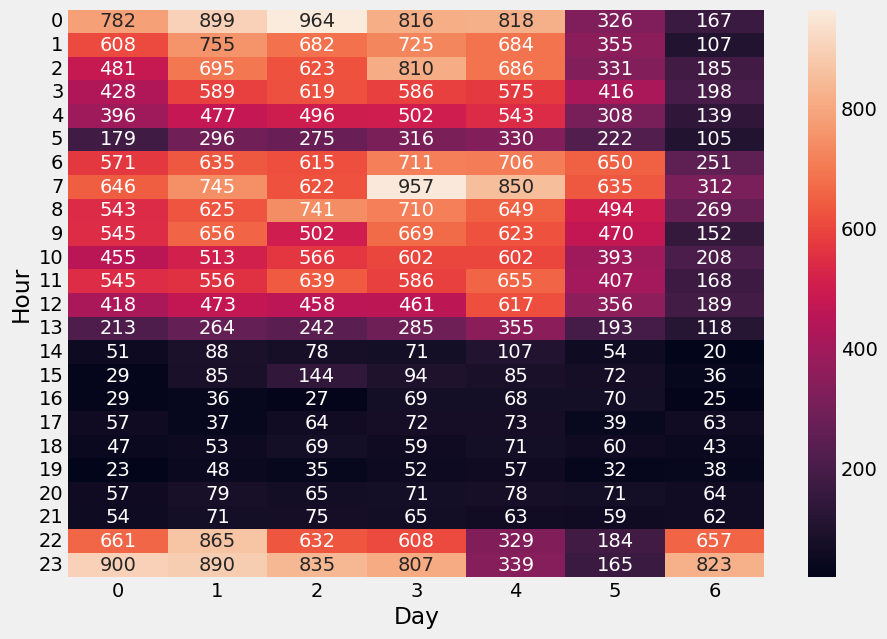

In [ ]:
crash_grp_day_hour = crash_df.groupby(["occurred_dayofweek", "occurred_hour", "occurred_weekday"]).count()["timezone"].reset_index()
crash_pivot_day_hour = crash_grp_day_hour.pivot(index="occurred_hour",
                                                    columns="occurred_weekday",
                                                    values="timezone").fillna(0)

plt.figure(figsize=(10,7))
sns.heatmap(crash_pivot_day_hour, annot=True, fmt="g")
plt.ylabel("Hour")
plt.xlabel("Day")

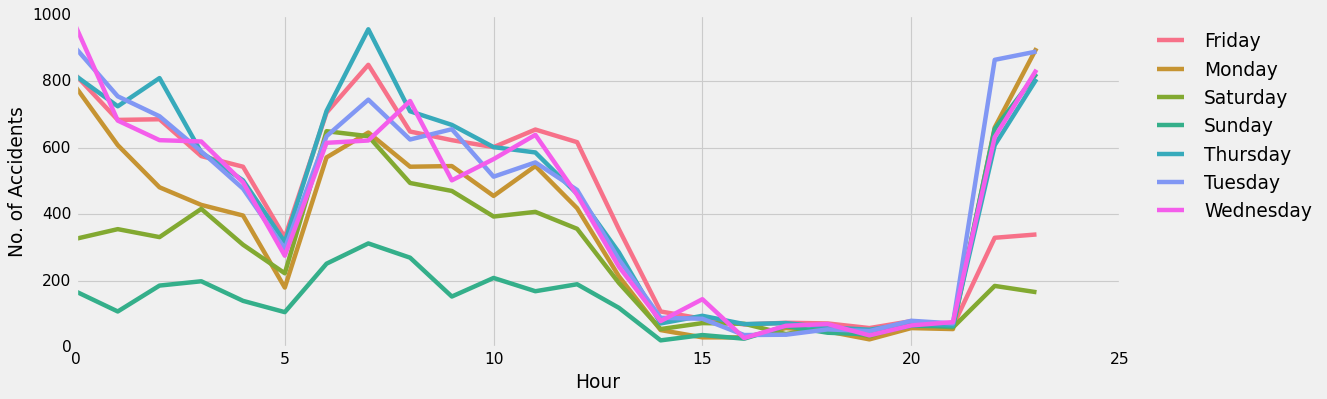

In [ ]:
style.use('fivethirtyeight')
plt.figure(figsize=(15, 5))
sns.lineplot(crash_grp_day_hour,
              x="occurred_hour",
              y="timezone",
              hue="occurred_dayofweek")
plt.ylabel("No. of Accidents")
plt.xlabel("Hour")
plt.legend(bbox_to_anchor=(1.2, 1))

In [ ]:
# -------------> fail

In [ ]:
crash_road.to_csv(dirs+'/crash_per_region.xlsx', index=False)

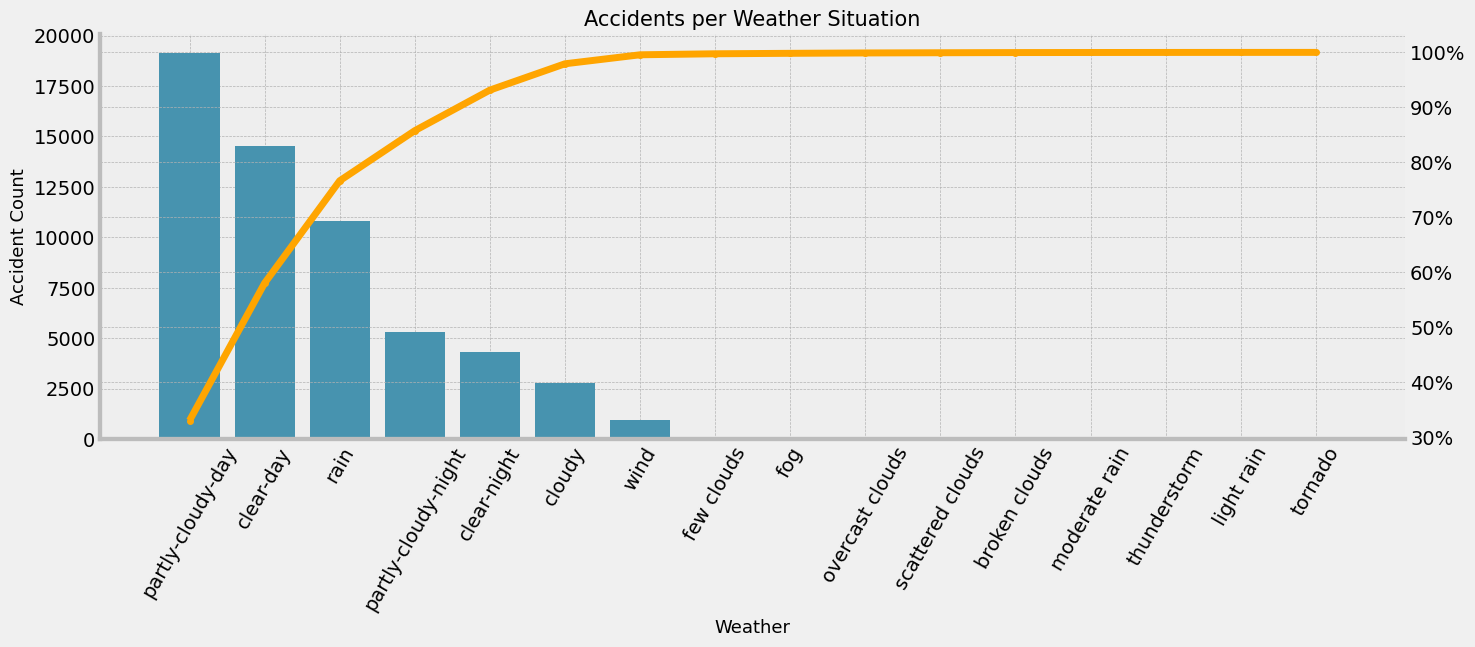

In [ ]:
# Accidents caused by weather
crash_weather = crash_df.groupby(['weather']).count()["timezone"].reset_index()
crash_weather.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_weather.rename(columns={"timezone": "Accident Count"}, inplace=True)
crash_weather["cum_percentage"] = crash_weather["Accident Count"].cumsum()/crash_weather["Accident Count"].sum() * 100

# Plot paretto
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(crash_weather.weather, crash_weather["Accident Count"], color="#4793AF")
plt.ylabel("Accident Count", fontsize=13)
plt.xlabel("Weather", fontsize=13)
plt.title("Accidents per Weather Situation", fontsize=15)
plt.xticks(rotation=60)

# Add cumulative
ax2 = ax.twinx()
ax2.plot(crash_weather.weather, crash_weather['cum_percentage'], color= "orange", marker="o", ms=4, linewidth=5)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_axisbelow(True)
# ax.grid()
ax.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)
style.use("default")

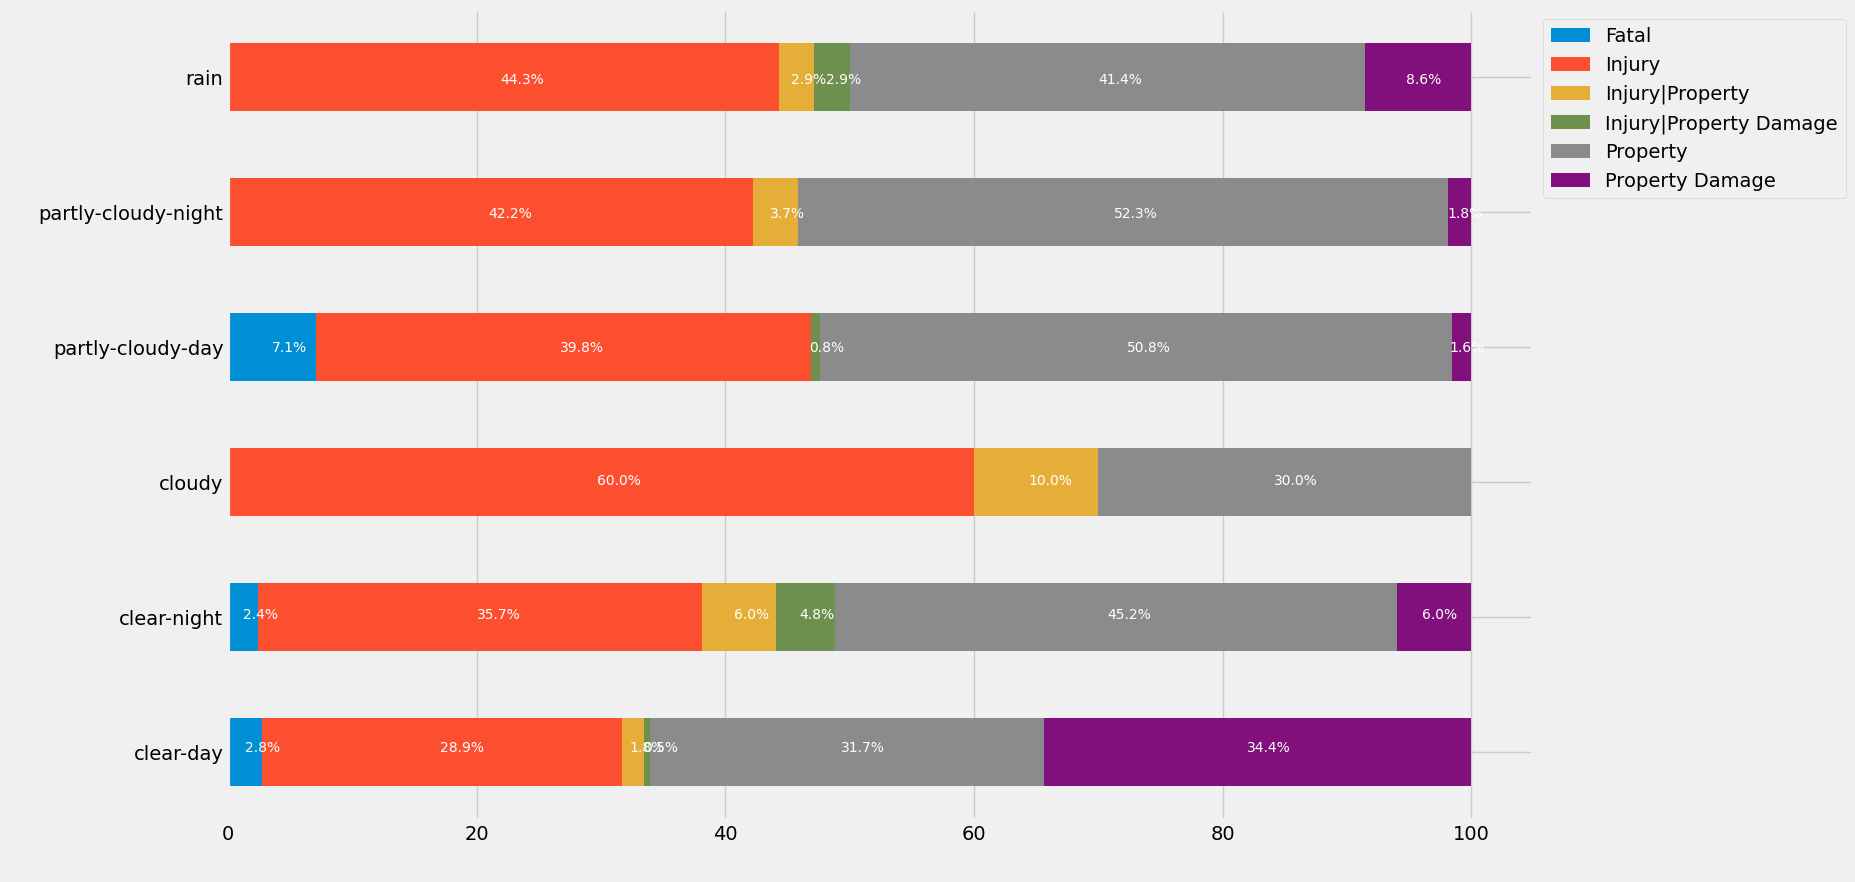

In [ ]:
style.use("fivethirtyeight")
crash_weather_06 = crash_weather[:6]
severity_by_weather = crash_df.groupby(["weather", "Severity"]).count()["timezone"].reset_index()

severity_by_weather_filtered = severity_by_weather[severity_by_weather['weather'].isin(crash_weather_06['weather'])]
severity_by_weather_filtered.sort_values(by=["timezone"], inplace=True, ascending=False)
severity_by_weather_filtered.rename(columns={'timezone':'accident count'}, inplace=True)
severity_by_weather__pivot = severity_by_weather_filtered.pivot(index = "weather",
                                                  columns = "Severity",
                                                  values = "accident count")

severity_by_weather__pivot = (severity_by_weather__pivot.div(severity_by_weather__pivot.sum(axis=1), axis=0) * 100)
ax = severity_by_weather__pivot.plot(kind="barh", stacked=True, figsize=(15, 10))
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel(" ")
plt.ylabel(" ")
annotate_stacked_bars_horizontal(ax, textsize=10)

In [ ]:
severity_per_weather = crash_df.groupby(["weather", "Severity"]).count()["timezone"].reset_index()
severity_per_weather

,weather,Severity,timezone
0,broken clouds,Fatal|Injury,1
1,broken clouds,Injury|Property Damage,7
2,broken clouds,Property Damage,11
3,clear-day,Fatal,6
4,clear-day,Injury,63
5,clear-day,Injury|Property,4
6,clear-day,Injury|Property Damage,1
7,clear-day,Property,69
8,clear-day,Property Damage,75
9,clear-night,Fatal,2


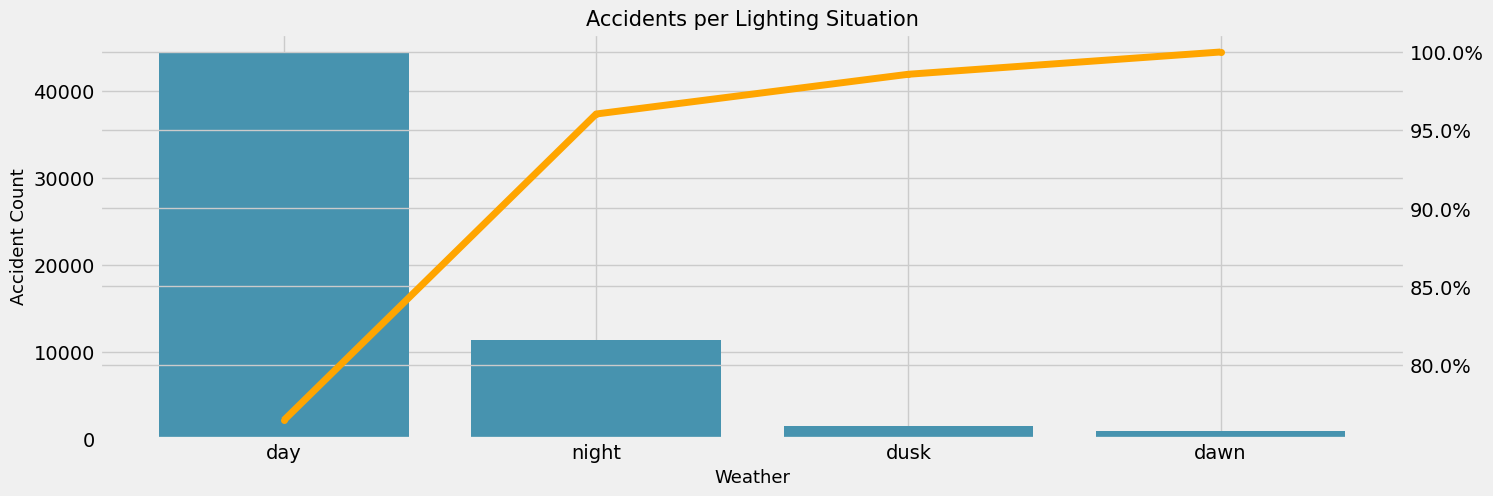

In [ ]:
# Accidents caused by lighting
crash_light = crash_df.groupby(['light']).count()["timezone"].reset_index()
crash_light.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_light.rename(columns={"timezone": "Accident Count"}, inplace=True)
crash_light["cum_percentage"] = crash_light["Accident Count"].cumsum()/crash_light["Accident Count"].sum() * 100

# Plot paretto
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(crash_light.light, crash_light["Accident Count"], color="#4793AF")
plt.ylabel("Accident Count", fontsize=13)
plt.xlabel("Weather", fontsize=13)
plt.title("Accidents per Lighting Situation", fontsize=15)

# Add cumulative
ax2 = ax.twinx()
ax2.plot(crash_light.light, crash_light['cum_percentage'], color= "orange", marker="o", ms=4, linewidth=5)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_axisbelow(True)
# ax.grid()
# ax.spines[['right', 'top']].set_visible(False)
# ax2.spines[['right', 'top']].set_visible(False)

Text(0.5, 1.0, 'Misclassification of lighting condition')

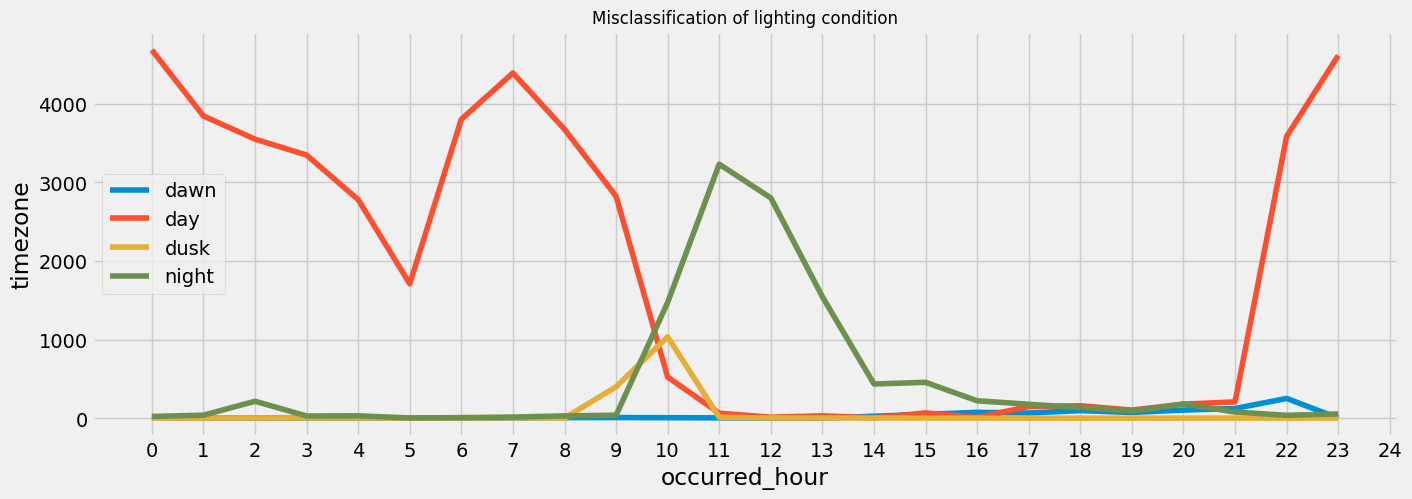

In [ ]:
crash_light_hour = crash_df.groupby(["light", "occurred_hour"]).count()["timezone"].reset_index()
crash_light_hour

plt.figure(figsize=(15, 5))
ax = sns.lineplot(crash_light_hour,
                  x="occurred_hour",
                  y="timezone",
                  hue="light")
plt.legend(loc="best")
plt.xticks(range(0, 25))
style.use('default')
plt.title("Misclassification of lighting condition")

In [ ]:
def lighting_condition(hour):
  # Check for day, night, dawn, dusk
    if 7 <= hour < 17:
        return 'Day'
    elif 17 <= hour < 22:
        return 'Dusk'
    elif 22 <= hour <= 24 or 0 <= hour < 5:
        return 'Night'
    elif 5 <= hour < 7:
        return 'Dawn'
    elif hour == 24:
        return 'Night'
    else:
        return 'Unknown'

crash_df["lighting_condition"] = crash_df["occurred_hour"].apply(lighting_condition)

In [ ]:
# crash_df["occurred_hour"].value_counts()

In [ ]:
crash_df["lighting_condition"].value_counts()

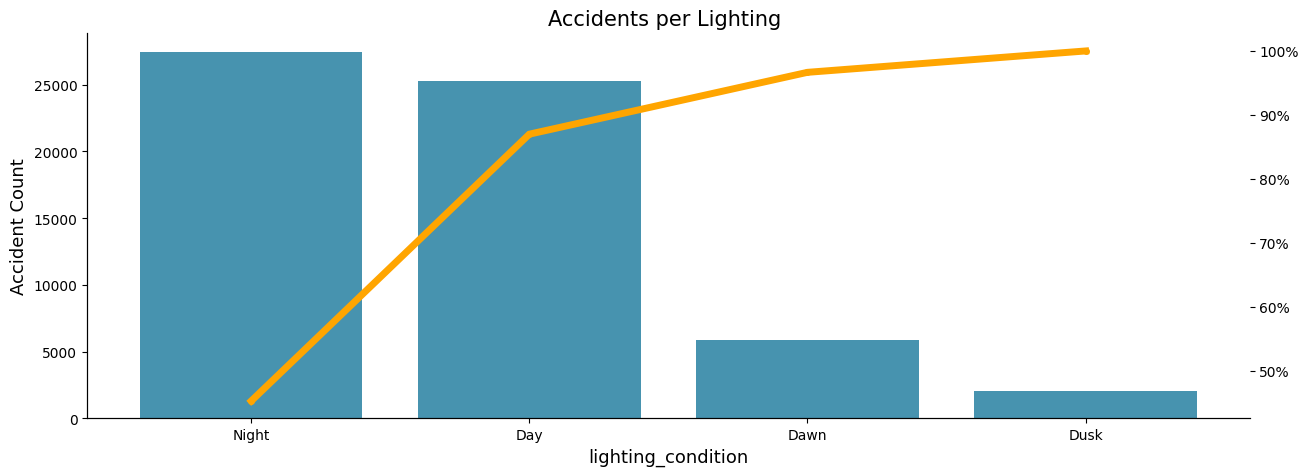

In [ ]:
# Accidents caused by lighting
crash_light = crash_df.groupby(['lighting_condition']).count()["timezone"].reset_index()
crash_light.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_light.rename(columns={"timezone": "Accident Count"}, inplace=True)
crash_light["cum_percentage"] = crash_light["Accident Count"].cumsum()/crash_light["Accident Count"].sum() * 100

# Plot paretto
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(crash_light.lighting_condition, crash_light["Accident Count"], color="#4793AF")
plt.ylabel("Accident Count", fontsize=13)
plt.xlabel("lighting_condition", fontsize=13)
plt.title("Accidents per Lighting ", fontsize=15)

# Add cumulative
ax2 = ax.twinx()
ax2.plot(crash_light.lighting_condition, crash_light['cum_percentage'], color= "orange", marker="o", ms=4, linewidth=5)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_axisbelow(True)
# ax.grid()
ax.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)

In [ ]:
crash_light_hour

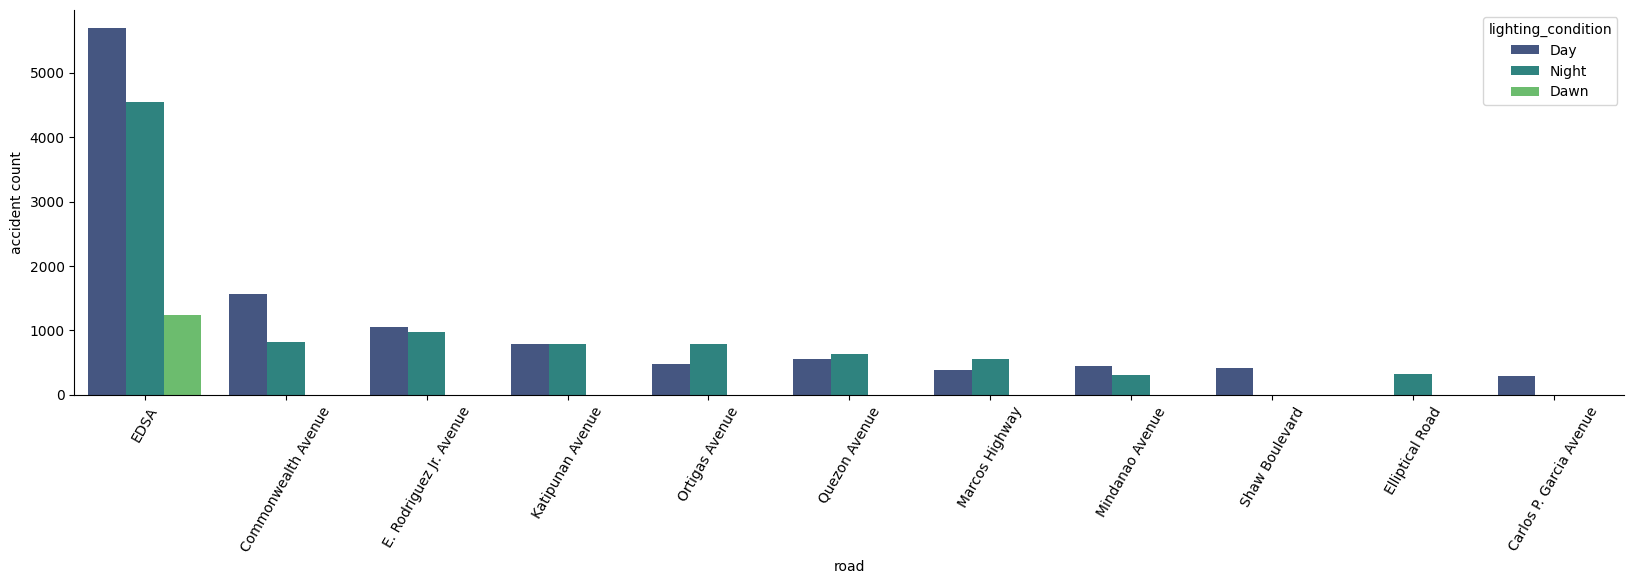

In [ ]:
crash_light_road = crash_df.groupby(["lighting_condition", "road"]).count()["timezone"].reset_index()
crash_light_road.rename(columns={'timezone': 'accident count'}, inplace=True)
crash_light_road.sort_values(by="accident count", inplace=True, ascending=False)

style.use("default")
plt.figure(figsize=(20, 5))
ax = sns.barplot(crash_light_road[:20],
                 x="road",
                 y="accident count",
                 hue="lighting_condition",
                 palette="viridis")
plt.xticks(rotation=60)
ax.spines[['right', 'top']].set_visible(False)

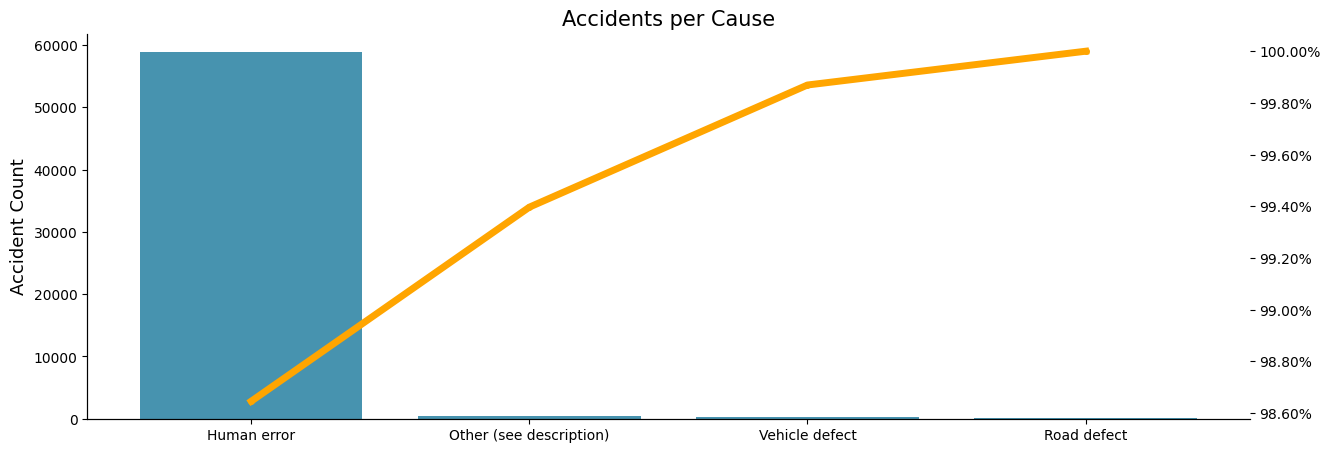

In [ ]:
# Accidents causes
crash_cause = crash_df.groupby(['Main Cause']).count()["timezone"].reset_index()
crash_cause.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_cause.rename(columns={"timezone": "Accident Count"}, inplace=True)
crash_cause["cum_percentage"] = crash_cause["Accident Count"].cumsum()/crash_cause["Accident Count"].sum() * 100

# Plot paretto
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(crash_cause["Main Cause"], crash_cause["Accident Count"], color="#4793AF")
plt.ylabel("Accident Count", fontsize=13)
plt.xlabel(" ", fontsize=13)
plt.title("Accidents per Cause", fontsize=15)

# Add cumulative
ax2 = ax.twinx()
ax2.plot(crash_cause["Main Cause"], crash_cause['cum_percentage'], color= "orange", marker="o", ms=4, linewidth=5)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_axisbelow(True)
# ax.grid()
ax.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)

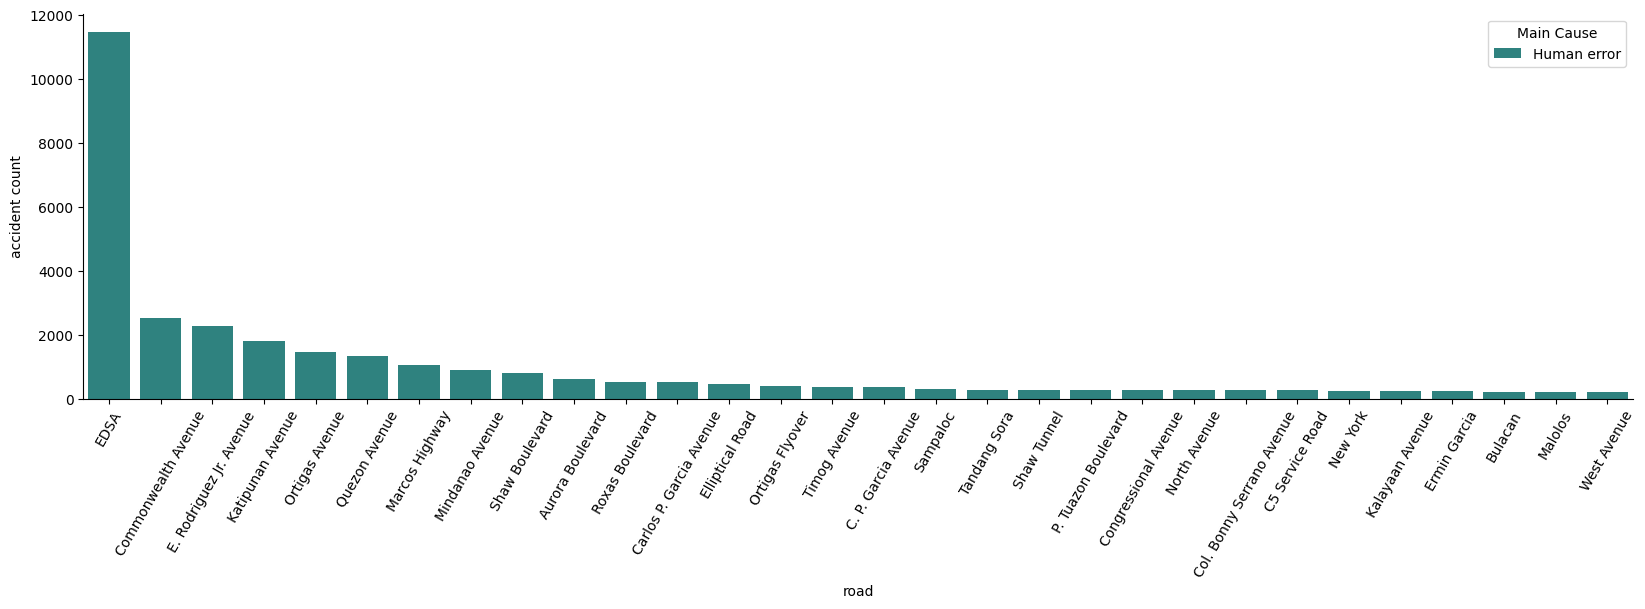

In [ ]:
crash_cause_road = crash_df.groupby(["Main Cause", "road"]).count()["timezone"].reset_index()
crash_cause_road.rename(columns={'timezone': 'accident count'}, inplace=True)
crash_cause_road.sort_values(by="accident count", inplace=True, ascending=False)

style.use("default")
plt.figure(figsize=(20, 5))
ax = sns.barplot(crash_cause_road[:30],
                 x="road",
                 y="accident count",
                 hue="Main Cause",
                 palette="viridis_r")
plt.xticks(rotation=60)
ax.spines[['right', 'top']].set_visible(False)

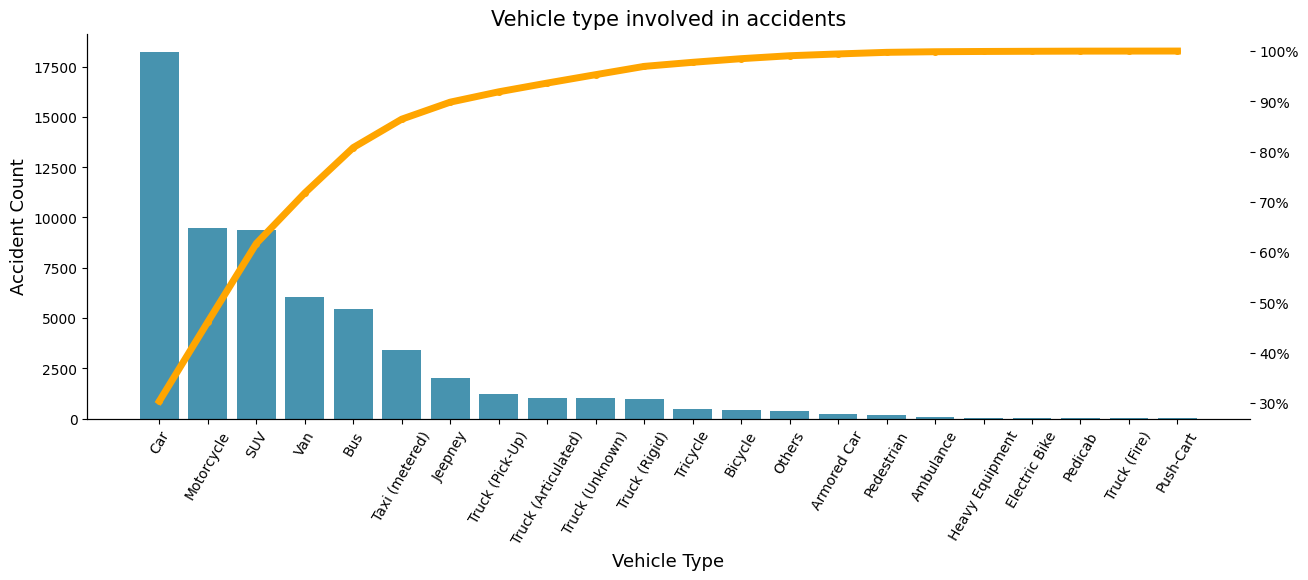

In [ ]:
# Vehicle Type
crash_car_type = crash_df.groupby(['Vehicle type']).count()["timezone"].reset_index()
crash_car_type.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_car_type.rename(columns={"timezone": "Accident Count"}, inplace=True)
crash_car_type["cum_percentage"] = crash_car_type["Accident Count"].cumsum()/crash_car_type["Accident Count"].sum() * 100

# Plot paretto
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(crash_car_type["Vehicle type"], crash_car_type["Accident Count"], color="#4793AF")
plt.ylabel("Accident Count", fontsize=13)
plt.xlabel("Vehicle Type", fontsize=13)
plt.title("Vehicle type involved in accidents", fontsize=15)
plt.xticks(rotation=60)

# Add cumulative
ax2 = ax.twinx()
ax2.plot(crash_car_type["Vehicle type"],
         crash_car_type['cum_percentage'],
         color= "orange",
         marker="o", ms=4, linewidth=5)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_axisbelow(True)

# ax.grid()
ax.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)

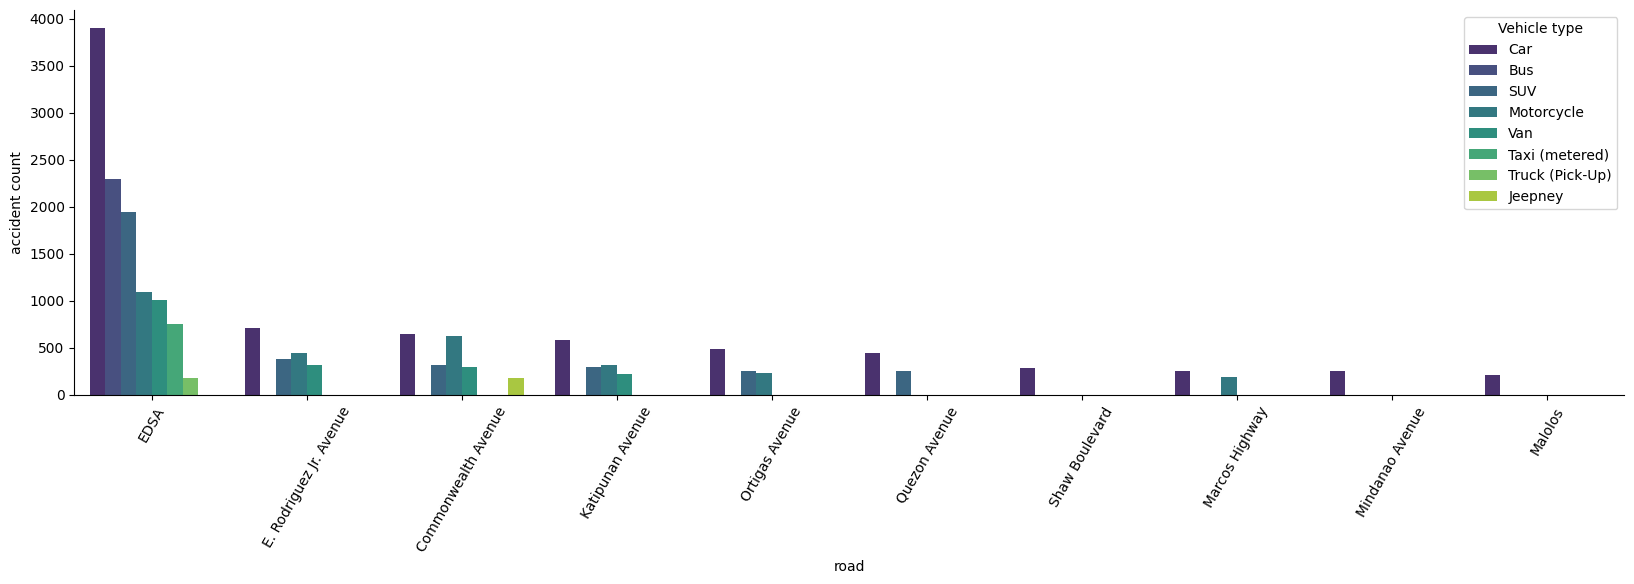

In [ ]:
crash_vehicle_road = crash_df.groupby(["Vehicle type", "road"]).count()["timezone"].reset_index()
crash_vehicle_road.rename(columns={'timezone': 'accident count'}, inplace=True)
crash_vehicle_road.sort_values(by="accident count", inplace=True, ascending=False)

style.use("default")
plt.figure(figsize=(20, 5))
ax = sns.barplot(crash_vehicle_road[:30],
                 x="road",
                 y="accident count",
                 hue="Vehicle type",
                 palette="viridis")
plt.xticks(rotation=60)
ax.spines[['right', 'top']].set_visible(False)

In [ ]:
crash_make = crash_df.groupby(["Make"]).count()["timezone"].reset_index()
crash_make.sort_values("timezone", ascending=False, inplace=True)
crash_make_greater100 = crash_make[crash_make["timezone"]>=100]
crash_make_greater100["Make"] = crash_make_greater100["Make"].str.lower()


def replace_toyota_vios(text):
    # Define the pattern to match "toyota vios"
    pattern = r'\btoyota\s+vios\b'
    pattern2 = r'\bvios+\s\b'

    # Replace "toyota vios" with "vios"
    replaced_text = re.sub(pattern, 'vios', text, flags=re.IGNORECASE)
    replaced_space = re.sub(pattern2, 'vios', text, flags=re.IGNORECASE)

    return replaced_text

def replace_toyota_innova(text):
    # Define the pattern to match "toyota vios"
    pattern = r'\btoyota\s+innova\b'

    # Replace "toyota vios" with "vios"
    replaced_text = re.sub(pattern, 'vios', text, flags=re.IGNORECASE)

    return replaced_text

In [ ]:
# Apply the replacement function to the 'cars' column
crash_make_greater100["Make"] = crash_make_greater100["Make"].apply(lambda x: replace_toyota_vios(x))
crash_make_greater100["Make"] = crash_make_greater100["Make"].apply(lambda x: replace_toyota_innova(x))

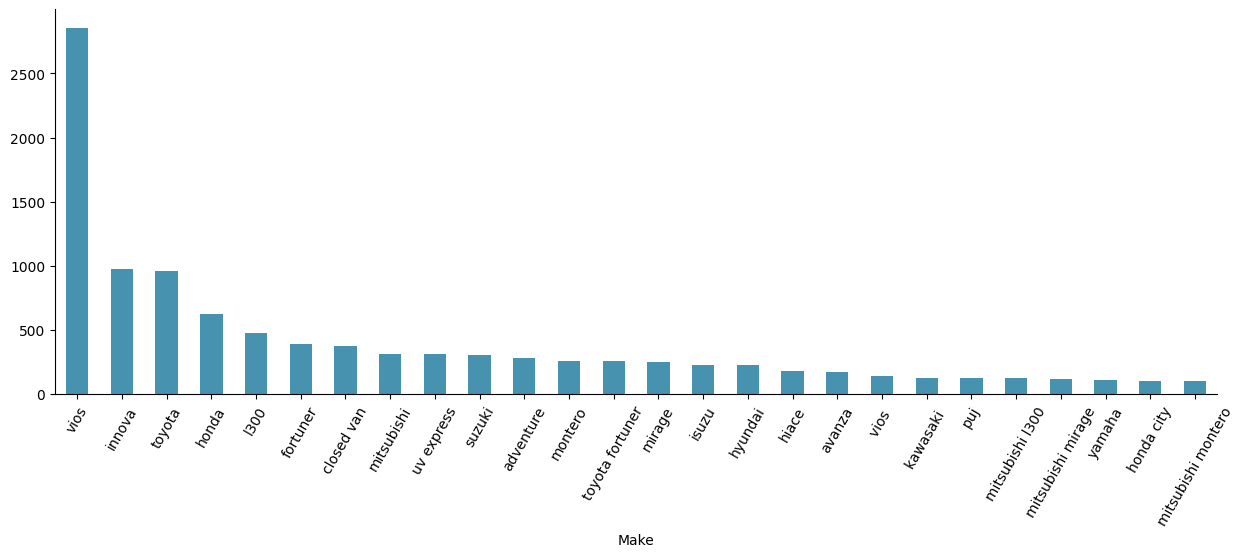

In [ ]:
# process
crash_make_greater100_2 = crash_make_greater100.groupby("Make").sum()["timezone"].reset_index()
crash_make_greater100_2[crash_make_greater100_2["Make"]=='vios ']
crash_make_greater100_2.sort_values("timezone", ascending=False, inplace=True)
crash_make_greater100_2.set_index("Make", inplace=True)
ax = crash_make_greater100_2.plot(kind="bar", figsize=(15, 5), color="#4793AF")
plt.xticks(rotation=60)
ax.spines[['right', 'top']].set_visible(False)
ax.get_legend().remove()

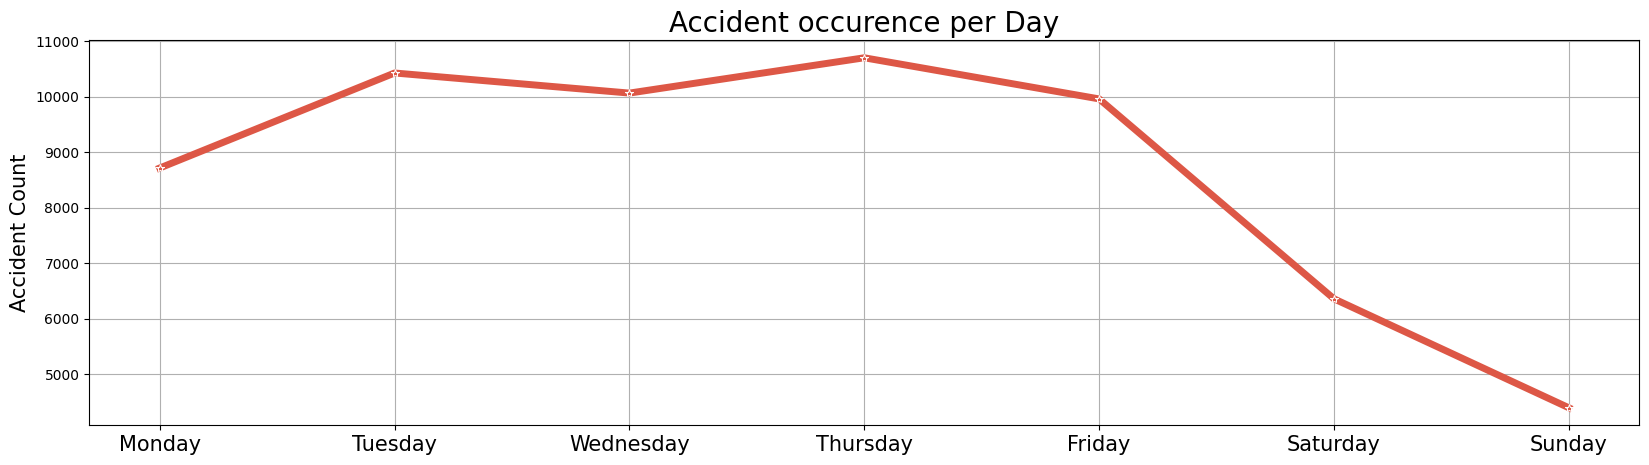

In [ ]:
crash_day = crash_df.groupby(["occurred_dayofweek", "occurred_weekday",]).count()["timezone"].reset_index()
crash_day = crash_df.groupby(["occurred_dayofweek", "occurred_weekday"]).count()["timezone"].reset_index()
# crash_day.sort_values(by=["timezone"], inplace=True, ascending=False)
crash_day.rename(columns={'timezone':'accident count'}, inplace=True)
crash_day.sort_values(by=["occurred_weekday"], inplace=True)
plt.figure(figsize=[20, 5])

ax = sns.lineplot(data=crash_day,
            x="occurred_dayofweek",
            y="accident count",
            marker="*",
            linewidth=5,
            color="#DD5746")

plt.ylabel("Accident Count", fontsize=15)
plt.xlabel("")
plt.title("Accident occurence per Day", fontsize=20)
plt.xticks(fontsize=15)
plt.grid()

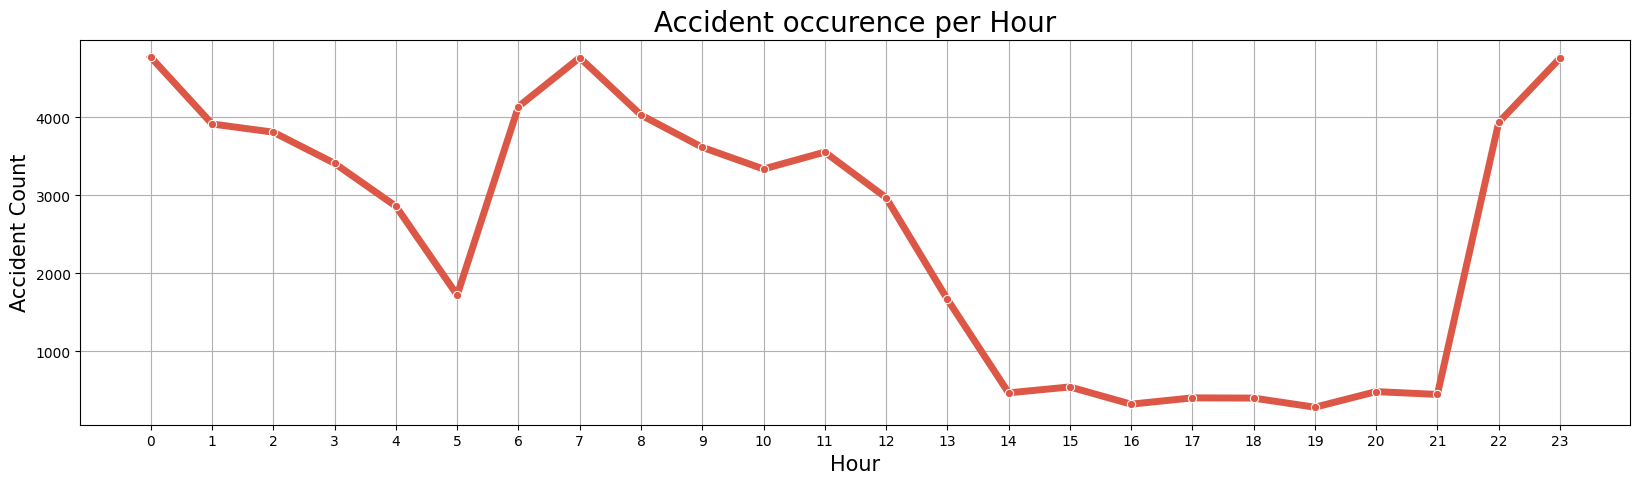

In [ ]:
crash_hour = crash_df.groupby(["occurred_hour"]).count()["timezone"].reset_index()
crash_hour.rename(columns={'timezone':'accident count'}, inplace=True)
plt.figure(figsize=[20, 5])

sns.lineplot(data=crash_hour,
            x="occurred_hour",
            y="accident count",
             marker="o",
             color="#DD5746",
             linewidth=5)
plt.ylabel("Accident Count", fontsize=15)
plt.xlabel("Hour", fontsize=15)
plt.title("Accident occurence per Hour", fontsize=20)
plt.xticks(range(0, 24))
plt.grid()

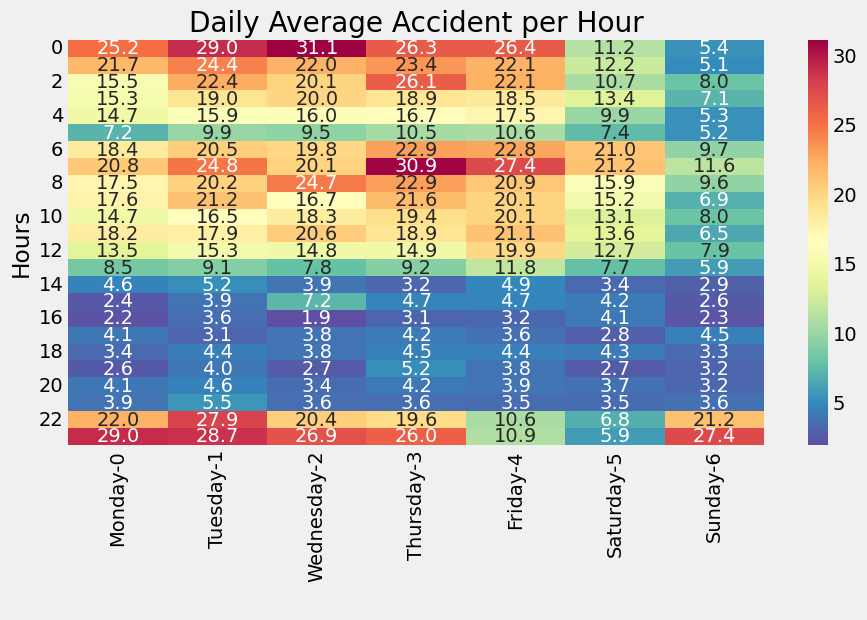

In [ ]:
crash_hour_day = crash_df.groupby(["occurred_dayofweek", "occurred_hour", "occurred_day", "occurred_weekday"]).count()["timezone"].reset_index()
crash_hour_weekday = crash_hour_day.groupby(["occurred_dayofweek", "occurred_hour", "occurred_weekday"]).mean()["timezone"].reset_index()
crash_hour_weekday.rename(columns={"timezone":'accident count'}, inplace=True)
crash_hour_weekday.sort_values(by="occurred_weekday", ascending=True, inplace=True)
crash_hour_weekday["occurred_hour"] = crash_hour_weekday["occurred_hour"].astype(int)
crash_pivot = crash_hour_weekday.pivot(index="occurred_hour",
                                   columns=["occurred_dayofweek", "occurred_weekday"],
                                   values="accident count")
style.use("fivethirtyeight")
plt.figure(figsize=(10,5))
plt.title("Daily Average Accident per Hour")
sns.heatmap(data=crash_pivot,
            annot=True,
            fmt='.1f',
            cmap="Spectral_r")
plt.yticks(rotation=360)
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.ylabel("Hours")
plt.show()


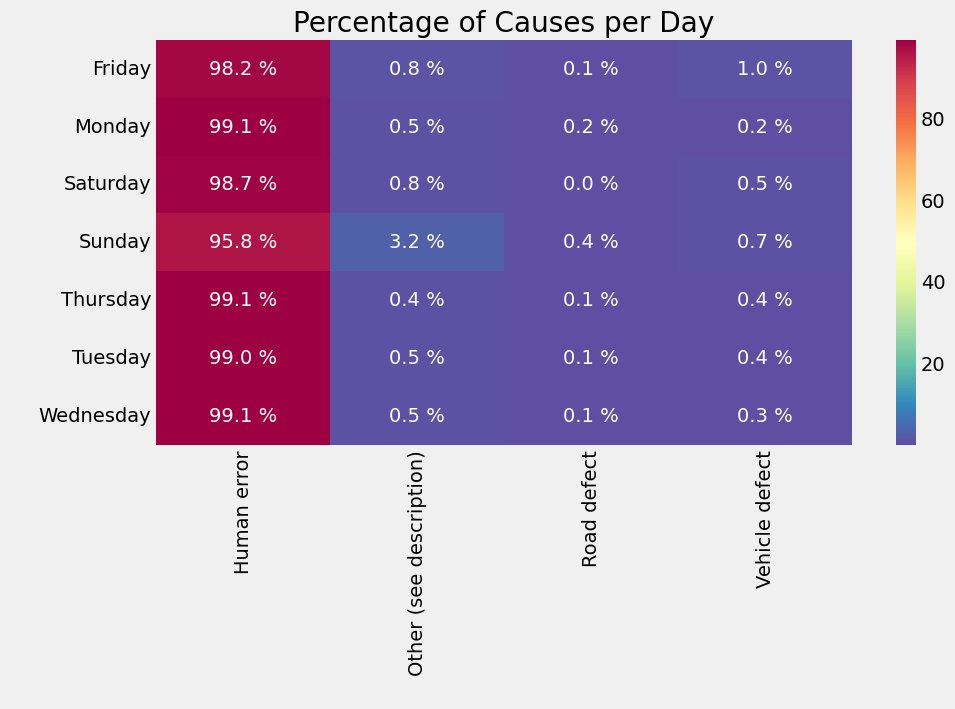

In [ ]:
crash_hour_day = crash_df.groupby(["occurred_dayofweek", "Main Cause"]).agg({"timezone": "count"})
crash_hour_day_pct = crash_hour_day.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
crash_hour_day_pct = crash_hour_day_pct.rename_axis(["dayofweek", "day","cause"]).reset_index()
crash_hour_day_pct.rename(columns={"timezone":'accident count'}, inplace=True)
crash_pivot = crash_hour_day_pct.pivot(index="cause",
                                   columns="dayofweek",
                                   values="accident count")
crash_pivot
plt.figure(figsize=(10,5))
plt.title("Percentage of Causes per Day")
ax = sns.heatmap(data=crash_pivot.T,
                annot=True,
                fmt='.1f',
                cmap="Spectral_r")
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.ylabel(" ")
plt.xlabel(" ", fontsize=13)
plt.show()
style.use("default")

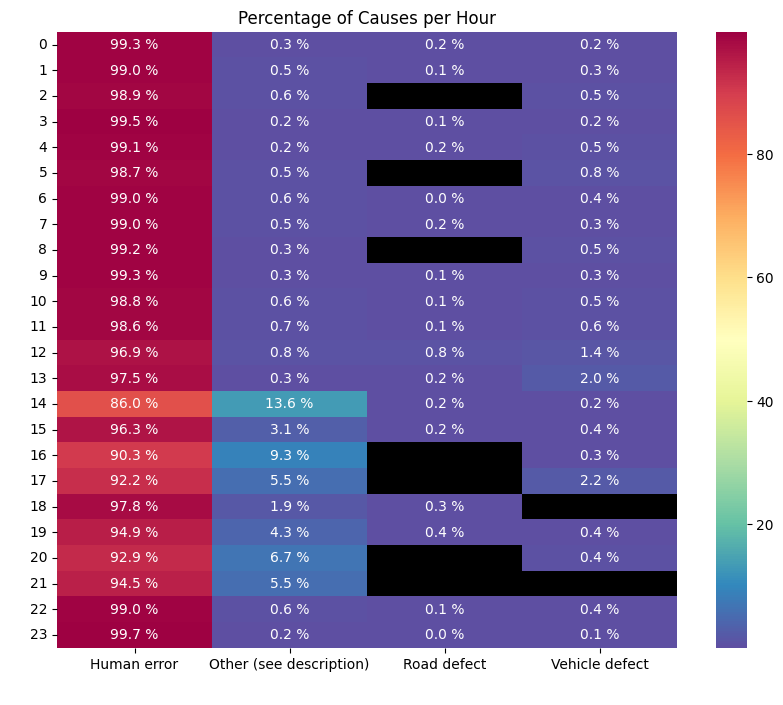

In [ ]:
crash_hour_day = crash_df.groupby(["occurred_hour", "Main Cause"]).agg({"timezone": "count"})
crash_hour_day_pct = crash_hour_day.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
crash_hour_day_pct = crash_hour_day_pct.rename_axis(["dayofweek", "hour","cause"]).reset_index()
crash_hour_day_pct.rename(columns={"timezone":'accident count'}, inplace=True)
crash_pivot = crash_hour_day_pct.pivot(index="cause",
                                   columns="hour",
                                   values="accident count")
plt.figure(figsize=(10,8))
plt.title("Percentage of Causes per Hour")
ax = sns.heatmap(data=crash_pivot.T,
                annot=True,
                fmt='.1f',
                cmap="Spectral_r")
ax.set_facecolor('xkcd:black')
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.ylabel(" ")
plt.yticks(rotation=0)
plt.xlabel(" ", fontsize=13)
plt.show()
style.use("default")

# **Demographics**

In [ ]:
crash_df["Gender"].value_counts()

,count
Gender,
Male,4674
Female,1173
Other,5


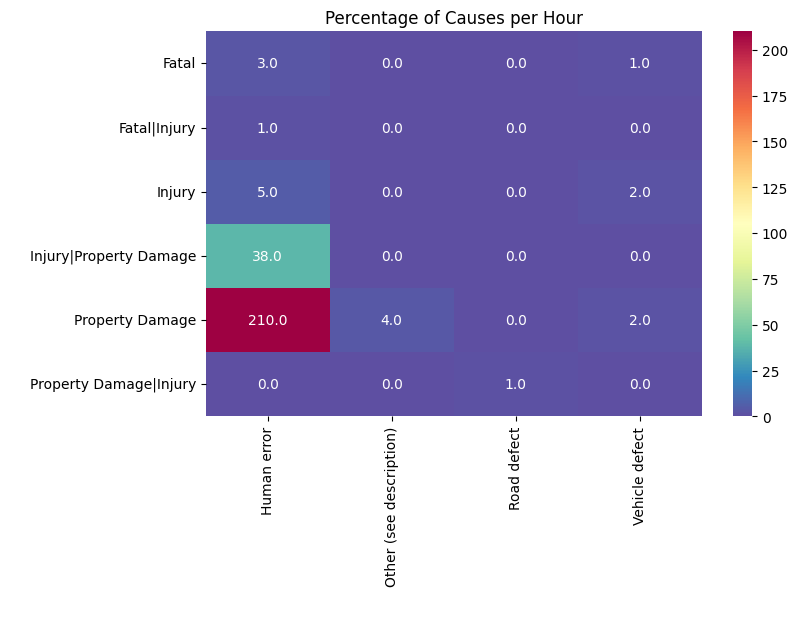

In [ ]:
crash_cause_severity = crash_df.groupby(["Main Cause", "Severity"]).count()["timezone"].reset_index()
crash_cause_severity.rename(columns={"timezone": "accident count"}, inplace=True)
crash_cause_severity_pivot = crash_cause_severity.pivot(index="Main Cause",
                                                        columns="Severity",
                                                        values="accident count")
# crash_cause_severity_pivot
cmap = 'coolwarm'
crash_cause_severity_pivot =crash_cause_severity_pivot.fillna(0)
plt.figure(figsize=(8,5))
plt.title("Percentage of Causes per Hour")
ax = sns.heatmap(data=crash_cause_severity_pivot.T,
                annot=True,
                fmt='.1f',
                cmap="Spectral_r")
# ax.set_facecolor('xkcd:black')
# for t in ax.texts: t.set_text(t.get_text() + " %")
plt.ylabel(" ")
plt.yticks(rotation=0)
plt.xlabel(" ", fontsize=13)
plt.show()
style.use("default")

# **Human Error**

# **Text Analysis: Enforcer's Notes**

In [ ]:
crash_df.columns

Index(['record_id', 'timezone', 'created', 'modified', 'occurred_from',
       'occurred_to', 'lat', 'lon', 'location_text', 'city', 'city_district',
       'county', 'neighborhood', 'road', 'state', 'weather', 'light',
       'Severity', 'driverIncidentDetails_id', 'Main Cause', 'Description',
       'Collision Type', 'Email of Encoder', 'Reporting Agency',
       'Location Approximate', 'Notes', 'driverNotes_id', 'Age', 'Gender',
       'Injury', 'Address', 'Hospital', 'driverPerson_id', 'Last Name',
       'First Name', 'Involvment', 'Middle Name', 'Driver error',
       'Alcohol/drugs', 'License Number', 'Seat belt/helmet', 'Make', 'Model',
       'Damage', 'Defect', 'Loading', 'Maneuver', 'driverVehicle_id',
       'Plate number', 'Vehicle type', 'Engine number', 'Chassis number',
       'Classification', 'Insurance details', 'Year', 'occurred_day',
       'occurred_dayofweek', 'occurred_weekday', 'occurred_hour',
       'occurred_month', 'occurred_year', 'region', 'lighting_condi

In [ ]:
from wordcloud import STOPWORDS
import re

In [ ]:
stopwords = set(STOPWORDS)

class text_cleaning():
    def __init__(self, text):
        self.text = text
        self.new_text = self.remove_special_chars()

    def remove_stopwords(self):
        no_stopwords = " ".join([word for word in str(self.text).split() if word not in stopwords])
        return no_stopwords

    def remove_special_chars(self):
        no_special_chars = re.sub(r"[^a-zA\s]","", self.remove_urls())
        no_hash = no_special_chars.replace("#", "").strip()
        self.new_text = no_hash
        return self.new_text

In [ ]:
accident_notes = crash_df[['Notes', 'Severity']].dropna()
accident_notes.Severity.value_counts()

,count
Severity,
Property Damage,202
Injury,181
Injury|Property Damage,28
Property,19
Fatal,5
Injury|Property,3
